# Plots for Event Analysis

This JuPyteR Notebook contains all plots generated from the data from Event Analysis.

In [1]:
# Load packages

import numpy
import matplotlib
import pandas
import math
import os
import scipy
from scipy import stats, integrate

import seaborn

seaborn.set(color_codes=True)
matplotlib.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.patches import Polygon
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#### Distribution of APN of Events with PacBio hits, vs Events without PacBio hits

I am going to make 5 plots:

Annotated junctions with vs without hits
Fragments with vs without hits
Annotated events (junctions+fragments) with and without hits
Unannotated junctions with and without hits
IR with and without hits

The final plots I will put into the paper are the last 3. If we wanted to put together annotated and unannotated hits
then we can do this later if needed


In [2]:
#import data

mcLab=os.environ["MCLAB"]

## NSCs
pbHitAPN=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/pacbio_hits_features_apn.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'),('flag_junction_annotated','<f8'),('flag_intron_retention','<f8'),
                               ('feature_type','|S30'),('flag_singleton','<f8'),('flag_pacbio_hit','<f8'),('mean_apn_npc','<f8')])

# Index   Variable                 Description
# 0       feature_id               Feature/event identifier
# 1       flag_junction_annotated  1=annotated junction
# 2       flag_intron_retention    1=putative IR event
# 3       feature_type             Event type (fragment, splicing)
# 4       flag_singleton           1=fragment is a singleton exon
# 5       flag_pacbio_hit          1=event has a PacBio hit
# 6       mean_apn_npc             Mean APN in NPCs




In [3]:
print(pbHitAPN)

[(b'F100003_SI:1', 0.0, 0.0, b'fragment', 0.0, 0.0, 2.1377840909)
 (b'F100003_SI:2', 0.0, 0.0, b'fragment', 0.0, 0.0, 0.2347972973)
 (b'F100008_SI:2', 0.0, 0.0, b'fragment', 0.0, 0.0, 0.0912087912) ...,
 (b'99730:1_2', 1.0, 0.0, b'splicing', 0.0, 1.0, 25.833333333)
 (b'99730:2_3', 1.0, 0.0, b'splicing', 0.0, 1.0, 60.290123457)
 (b'99730:3_4', 1.0, 0.0, b'splicing', 0.0, 1.0, 72.635802469)]


In [4]:
## Put data into data frames
## I want to plot fragments and junctions separately, and then together

dfFragHit=[]
dfFragNoHit=[]
dfJuncAnnotHit=[]
dfJuncAnnotNoHit=[]
dfEventAnnotHit=[]
dfEventAnnotNoHit=[]
dfJuncUnannotHit=[]
dfJuncUnannotNoHit=[]
dfIRHit=[]
dfIRNoHit=[]


for i in range(0,len(pbHitAPN)):
    if pbHitAPN[i][5] == 0:
        if pbHitAPN[i][3] == b'fragment':
            dfEventAnnotNoHit.append(math.log(pbHitAPN[i][6])+1)
            dfFragNoHit.append(math.log(pbHitAPN[i][6])+1)
        else:
            if pbHitAPN[i][1] == 1.0:
                dfJuncAnnotNoHit.append(math.log(pbHitAPN[i][6])+1)
                dfEventAnnotNoHit.append(math.log(pbHitAPN[i][6])+1)
            else:
                if pbHitAPN[i][2] == 1.0:
                    dfIRNoHit.append(math.log(pbHitAPN[i][6])+1)
                else:
                    dfJuncUnannotNoHit.append(math.log(pbHitAPN[i][6])+1)
    else:
        if pbHitAPN[i][3] == b'fragment':
            dfEventAnnotHit.append(math.log(pbHitAPN[i][6])+1)
            dfFragHit.append(math.log(pbHitAPN[i][6])+1)
        else:
            if pbHitAPN[i][1] == 1.0:
                dfJuncAnnotHit.append(math.log(pbHitAPN[i][6])+1)
                dfEventAnnotHit.append(math.log(pbHitAPN[i][6])+1)
            else:
                if pbHitAPN[i][2] == 1.0:
                    dfIRHit.append(math.log(pbHitAPN[i][6])+1)
                else:
                    dfJuncUnannotHit.append(math.log(pbHitAPN[i][6])+1)
            

# Index   Variable                 Description
# 0       feature_id               Feature/event identifier
# 1       flag_junction_annotated  1=annotated junction
# 2       flag_intron_retention    1=putative IR event
# 3       feature_type             Event type (fragment, splicing)
# 4       flag_singleton           1=fragment is a singleton exon
# 5       flag_pacbio_hit          1=event has a PacBio hit
# 6       mean_apn_npc             Mean APN in NPCs

            
            
            
print(len(dfFragHit))
print(len(dfFragNoHit))
print(len(dfJuncAnnotHit))
print(len(dfJuncAnnotNoHit))
print(len(dfEventAnnotHit))
print(len(dfEventAnnotNoHit))
print(len(dfJuncUnannotHit))
print(len(dfJuncUnannotNoHit))
print(len(dfIRHit))
print(len(dfIRNoHit))


23184
126796
43462
46350
66646
173146
204
8208
804
26688


/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

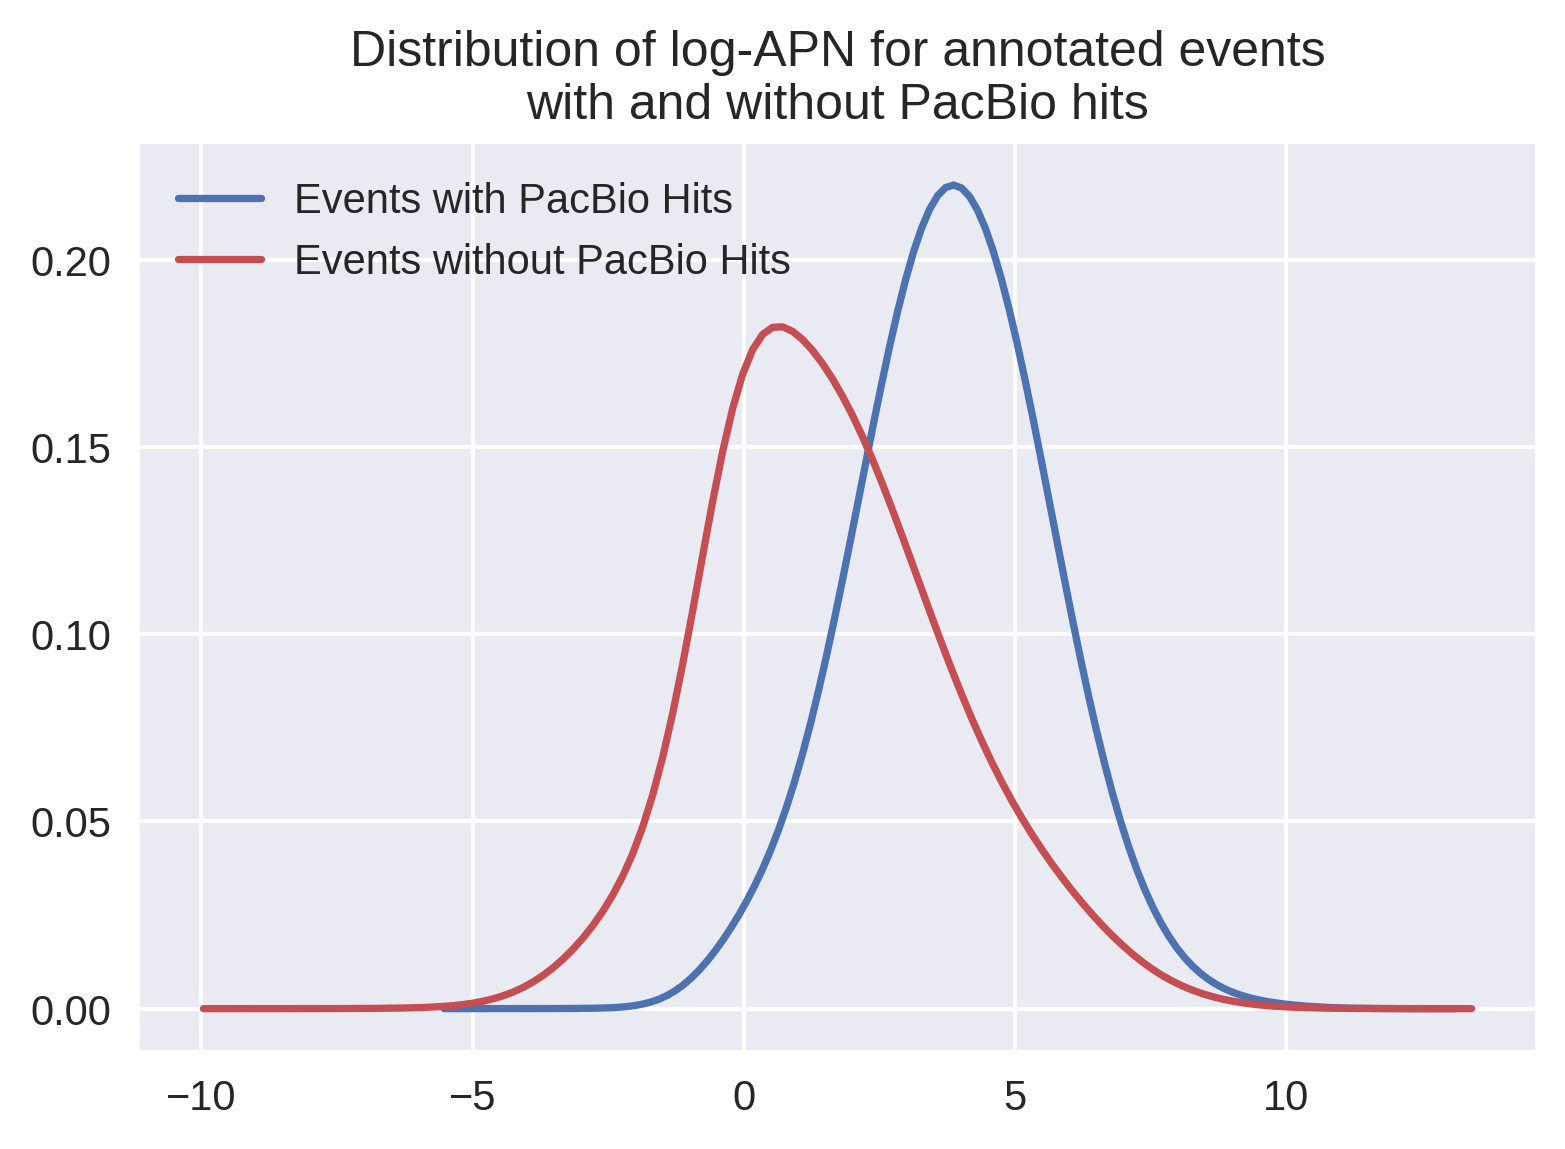

In [7]:
## Plot all annotated events together first

x=numpy.asarray(dfEventAnnotHit)
y=numpy.asarray(dfEventAnnotNoHit)

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(x, bw=0.75, label="Events with PacBio Hits", color="b")
seaborn.kdeplot(y, bw=0.75, label="Events without PacBio Hits", color="r")
plt.title("Distribution of log-APN for annotated events\nwith and without PacBio hits")
plt.legend

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

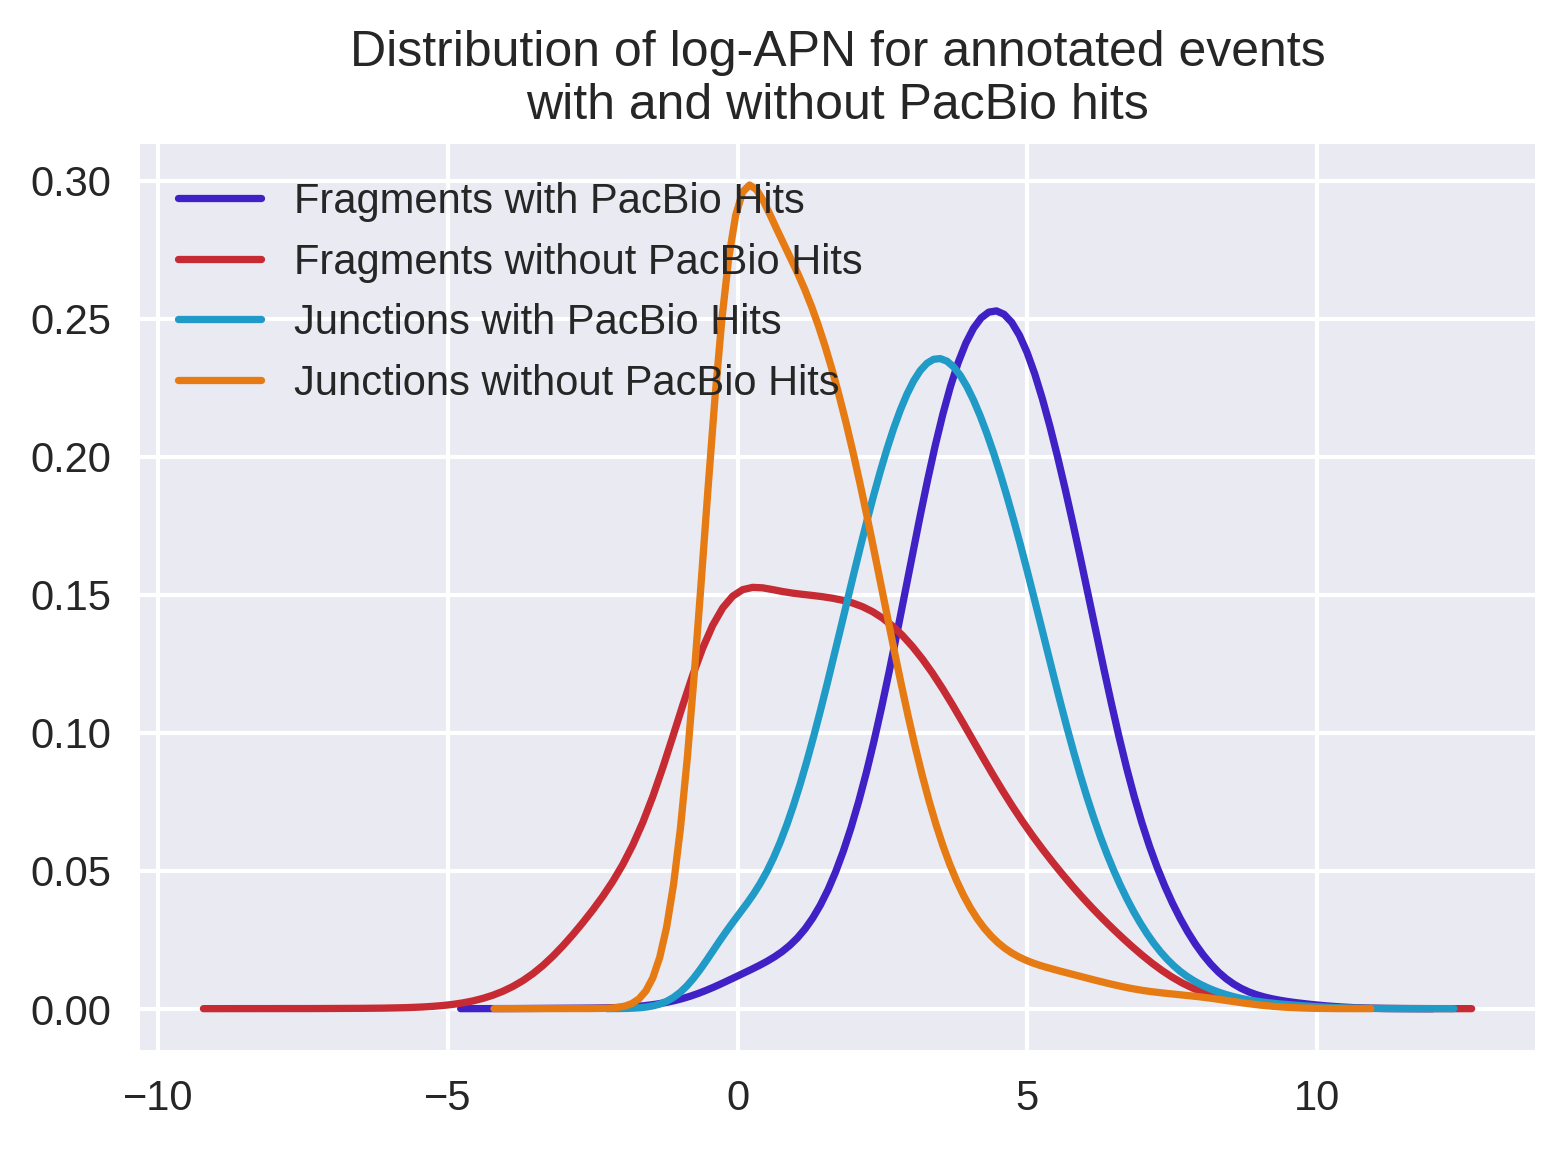

In [14]:
## Plot by feature type

x=numpy.asarray(dfFragHit)
y=numpy.asarray(dfFragNoHit)
w=numpy.asarray(dfJuncAnnotHit)
z=numpy.asarray(dfJuncAnnotNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(x, bw=0.5, label="Fragments with PacBio Hits", color="#4021c6")
seaborn.kdeplot(y, bw=0.5, label="Fragments without PacBio Hits", color="#c62b33")
seaborn.kdeplot(w, bw=0.5, label="Junctions with PacBio Hits", color="#209ac6")
seaborn.kdeplot(z, bw=0.5, label="Junctions without PacBio Hits", color="#e57b12")
plt.title("Distribution of log-APN for annotated events\nwith and without PacBio hits")
plt.legend

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

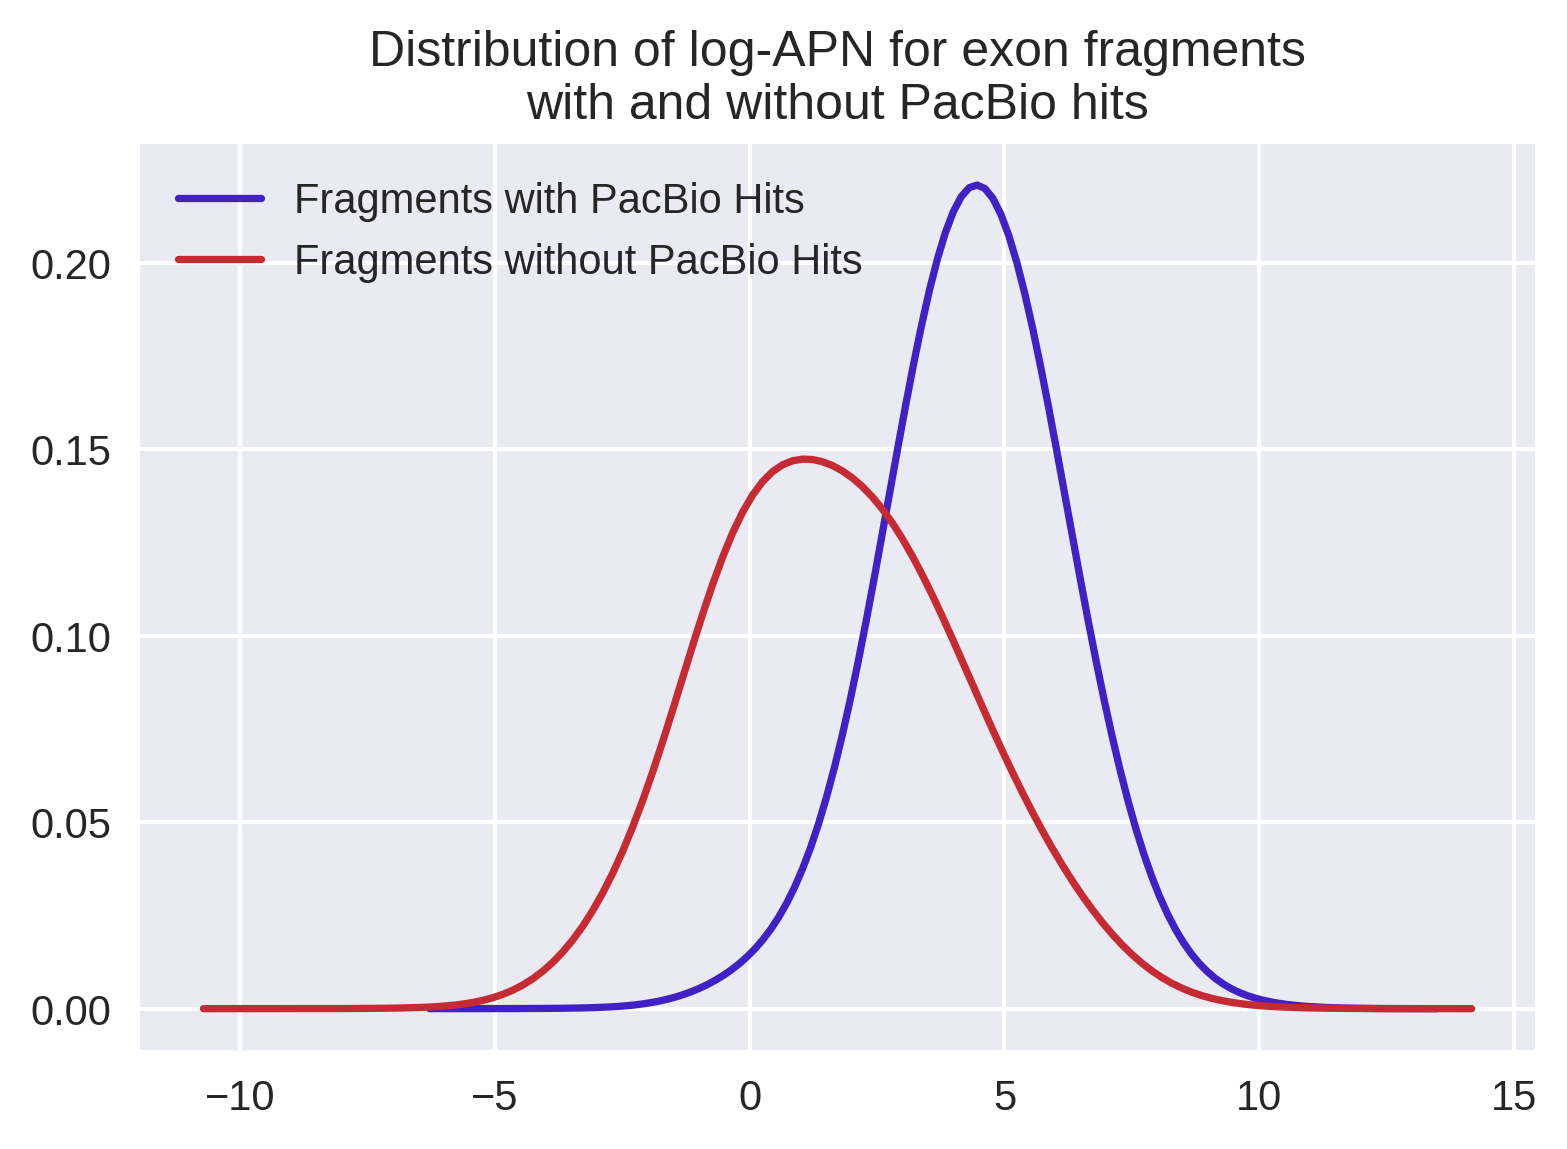

In [15]:
## Plot by feature type

x=numpy.asarray(dfFragHit)
y=numpy.asarray(dfFragNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(x, bw=1, label="Fragments with PacBio Hits", color="#4021c6")
seaborn.kdeplot(y, bw=1, label="Fragments without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for exon fragments\nwith and without PacBio hits")
plt.legend

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

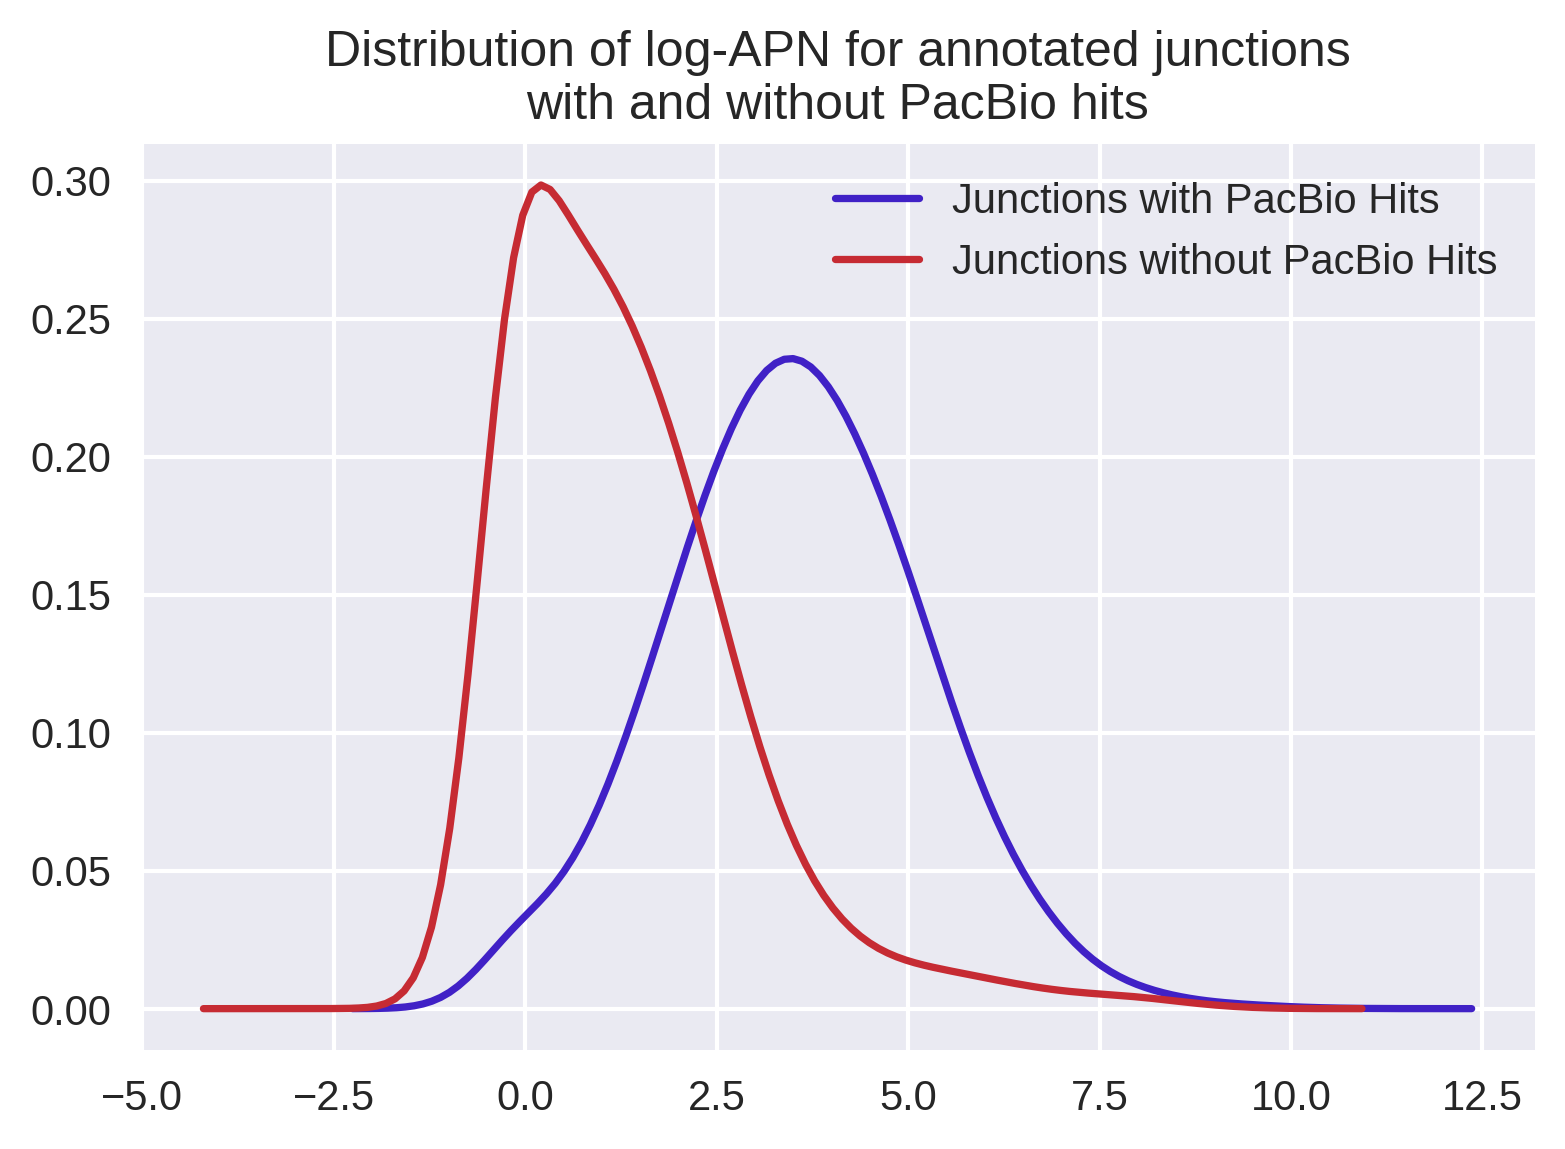

In [16]:
## Plot by feature type

w=numpy.asarray(dfJuncAnnotHit)
z=numpy.asarray(dfJuncAnnotNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(w, bw=0.5, label="Junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Junctions without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for annotated junctions\nwith and without PacBio hits")
plt.legend

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

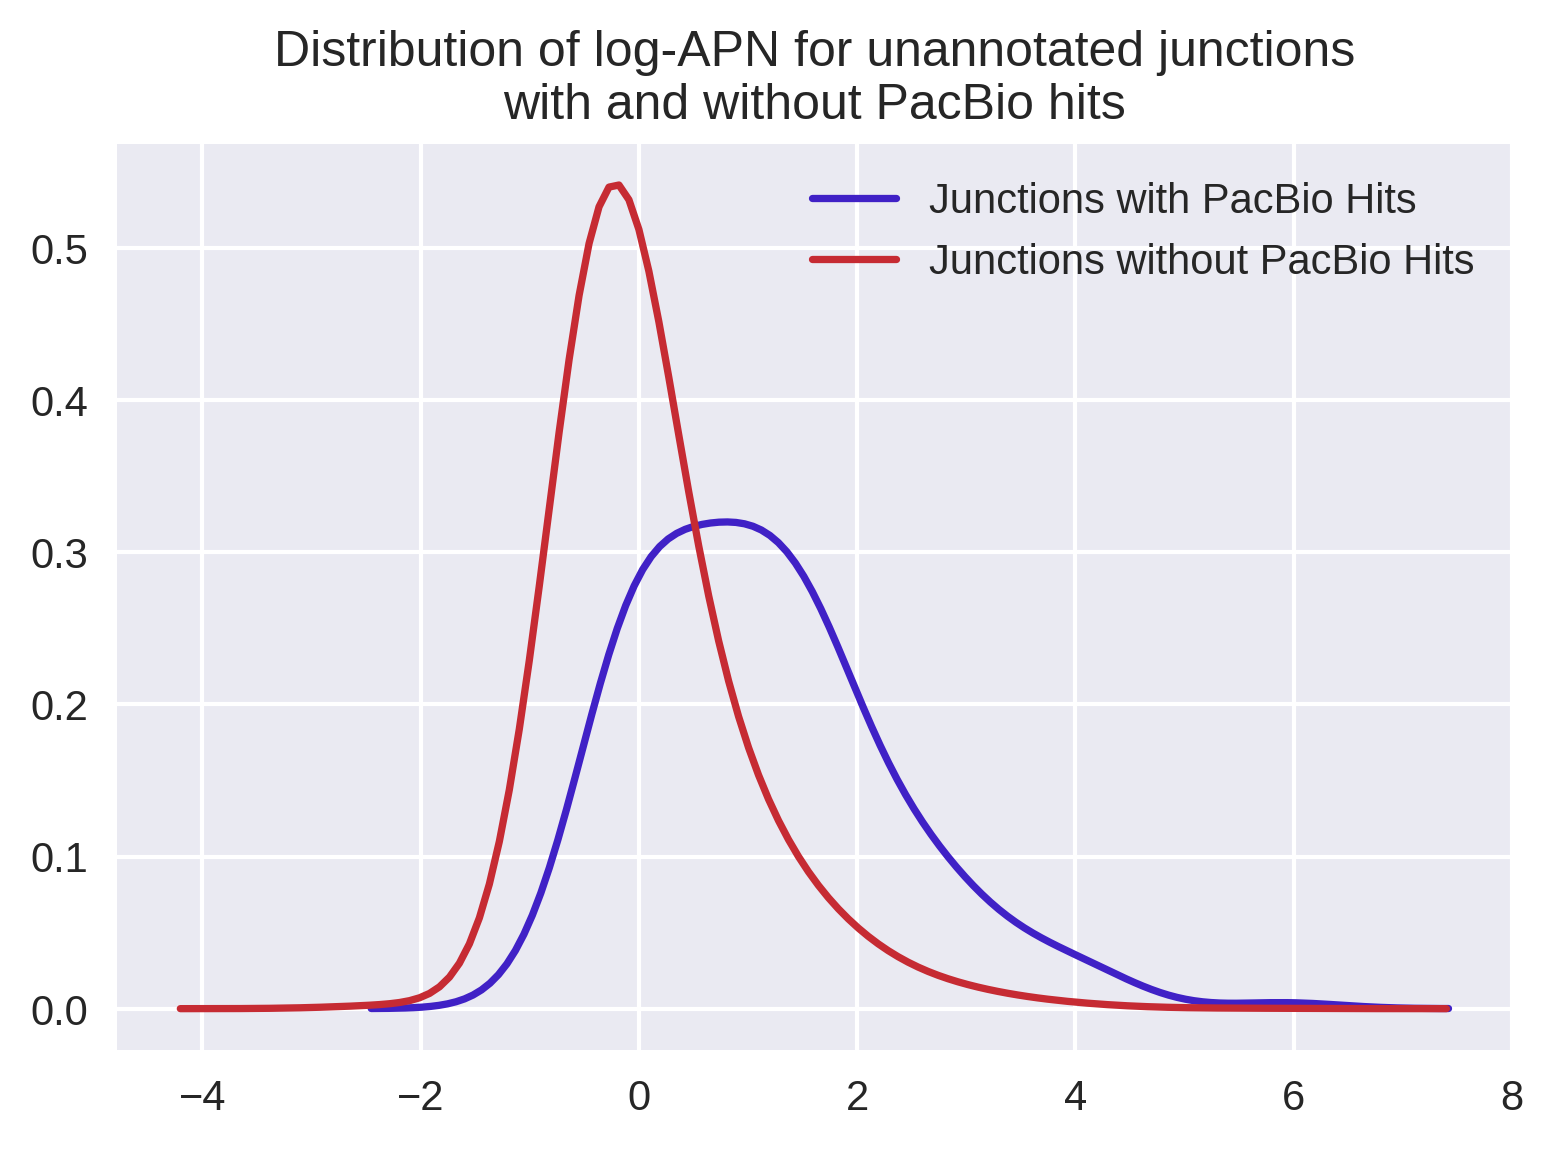

In [17]:
## Plot by feature type

w=numpy.asarray(dfJuncUnannotHit)
z=numpy.asarray(dfJuncUnannotNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(w, bw=0.5, label="Junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Junctions without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for unannotated junctions\nwith and without PacBio hits")
plt.legend

/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

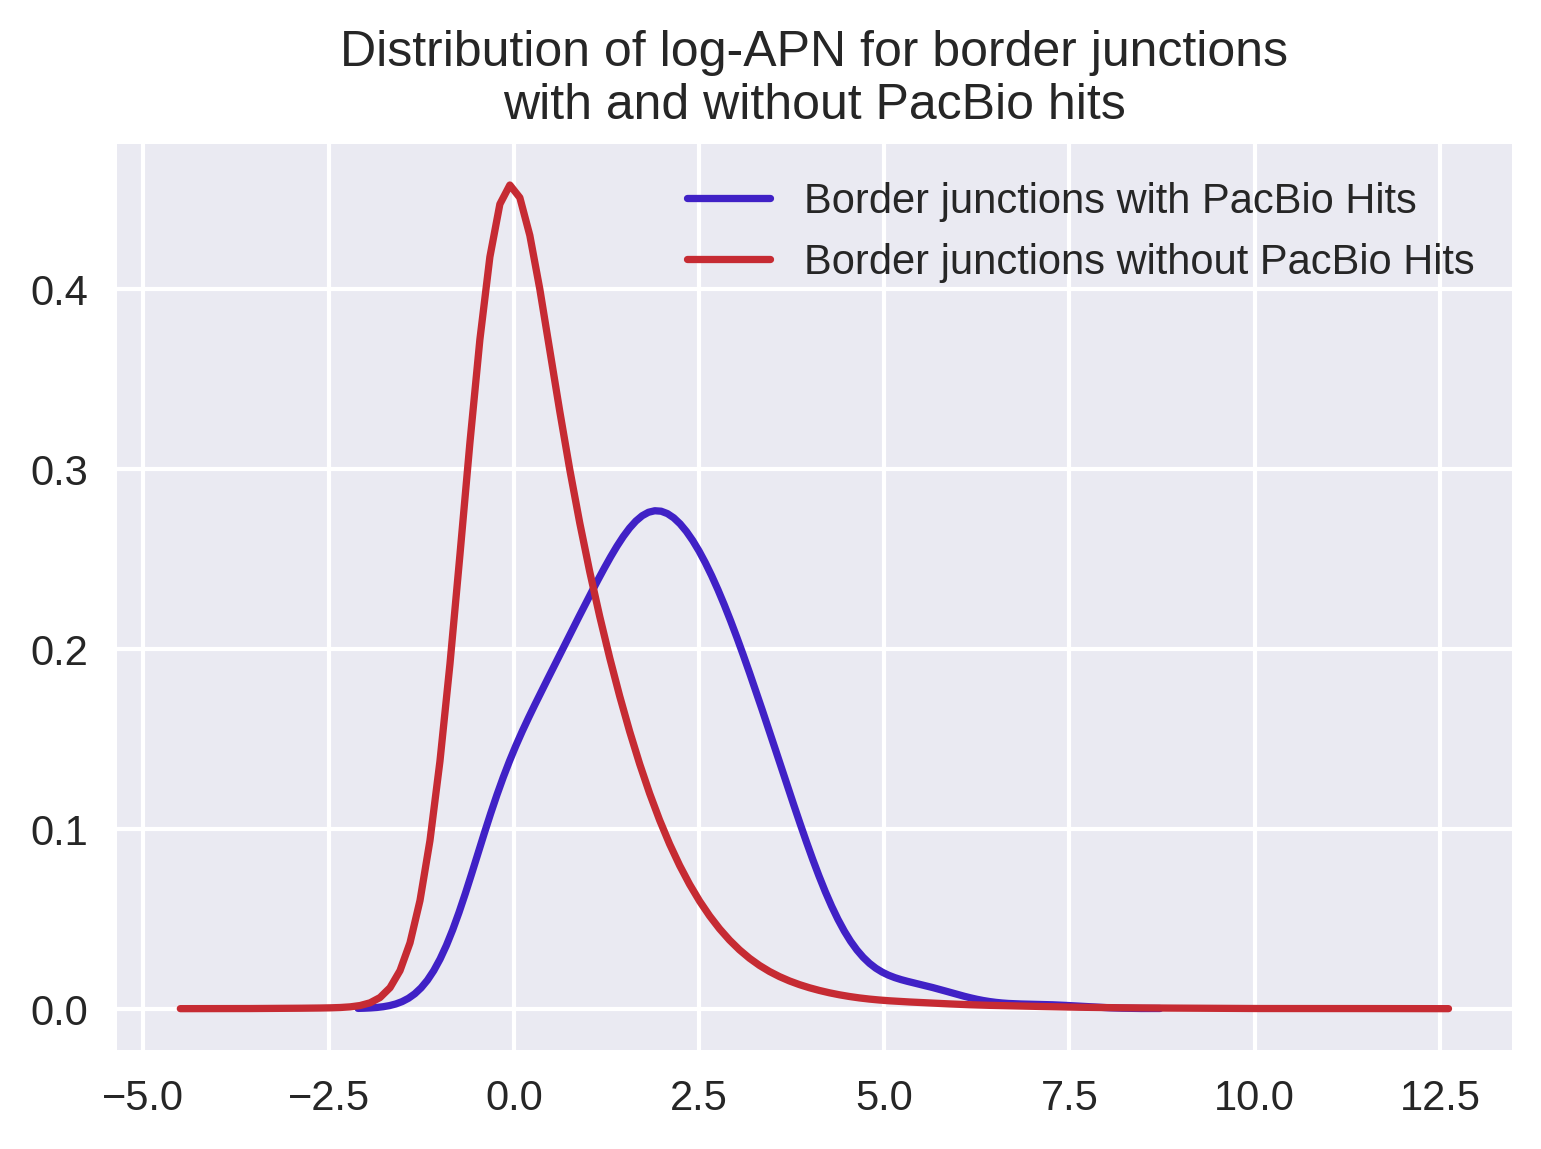

In [8]:
## Plot by feature type

w=numpy.asarray(dfIRHit)
z=numpy.asarray(dfIRNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(w, bw=0.5, label="Border junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Border junctions without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for border junctions\nwith and without PacBio hits")
plt.legend

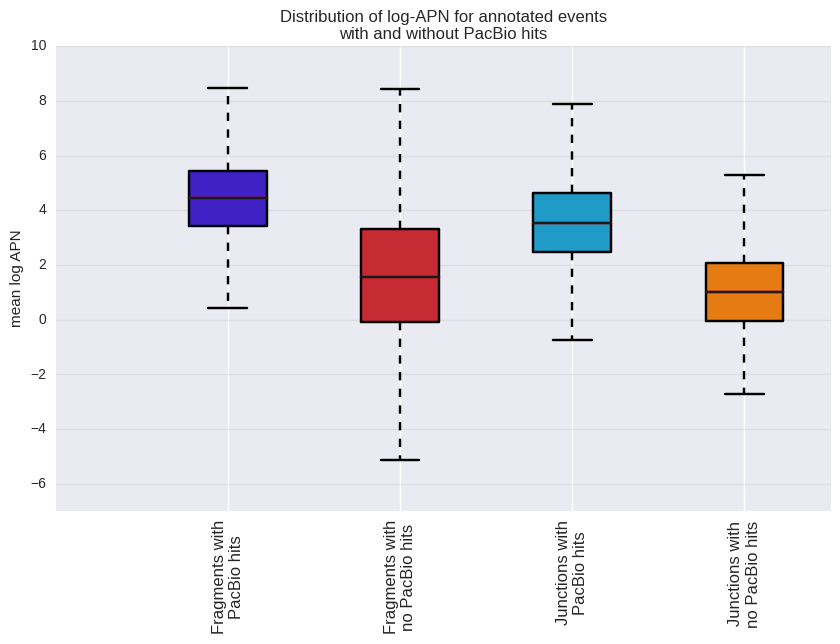

In [65]:
## Plot as boxplots 

numDist=4
data=[dfFragHit,dfFragNoHit,dfJuncHit,dfJuncNoHit]


fig, ax1 = plt.subplots(figsize=(10,6))

bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of log-APN for annotated events\nwith and without PacBio hits')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean log APN')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 4
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Fragments with\nPacBio hits', 'Fragments with\nno PacBio hits',
             'Junctions with\nPacBio hits', 'Junctions with\nno PacBio hits']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 10
bottom = -7
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()


In [71]:
## Import counts for unannotated features

#import data

mcLab=os.environ["MCLAB"]

## NSCs
UnAnnotAPN=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/pacbio_hits_unannotated_features_apn.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'),('flag_junction_annotated','<f8'),('flag_intron_retention','<f8'),
                               ('flag_pacbio_hit','<f8'),('_TYPE_','<f8'),('_FREQ_','<f8'),('mean_apn_npc','<f8')])


# Index   Variable              
# 0       feature_id
# 1       flag_junction_annotated
# 2       flag_intron_retention
# 3       flag_pacbio_hit
# 4       _TYPE_
# 5       _FREQ_
# 6       mean_apn_npc



In [74]:
## Put data into data frames
## I want to plot fragments and junctions separately, and then together

dfUnannotJunc=[]
dfIR=[]

for i in range(0,len(UnAnnotAPN)):
    if UnAnnotAPN[i][2] == 0:
        dfUnannotJunc.append(math.log(UnAnnotAPN[i][6])+1)
    else:
        dfIR.append(math.log(UnAnnotAPN[i][6])+1)
            
print len(dfUnannotJunc)
print len(dfIR)



8412
27492


<function matplotlib.pyplot.legend>

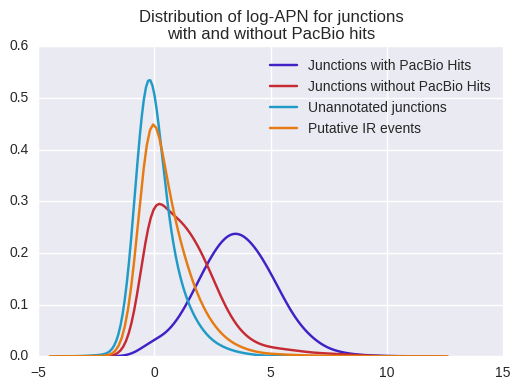

In [76]:
## Plot by feature type

w=numpy.asarray(dfJuncHit)
z=numpy.asarray(dfJuncNoHit)
m=numpy.asarray(dfUnannotJunc)
n=numpy.asarray(dfIR)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

seaborn.kdeplot(w, bw=0.5, label="Junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Junctions without PacBio Hits", color="#c62b33")
seaborn.kdeplot(m, bw=0.5, label="Unannotated junctions", color="#209ac6")
seaborn.kdeplot(n, bw=0.5, label="Putative IR events", color="#e57b12")
plt.title("Distribution of log-APN for junctions\nwith and without PacBio hits")
plt.legend

Unannotated events are on the lower spectrum of coverage overall, much less than annotated junctions with OR without PacBio hits. These could still be evidence of novel transcripts, albeit probably lowly-expressed (and since it is generally lower than junctions with PB hits, we likely wouldn't see them)

In [10]:
## Recounts for unannotaed events (APN>5 both reps)

#import data

mcLab=os.environ["MCLAB"]

## NSCs
pbHitAPN=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/pacbio_hits_unannotated_events_apn.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'),('gene_id','|S30'),('flag_junction_annotated','<f8'),('flag_intron_retention','<f8'),
                               ('flag_feature_on_ge5','<f8'),('flag_event_has_hit','<f8'),('mean_apn_npc','<f8')])

# Index   Variable                 Description
# 0       feature_id               Feature/event identifier
# 1       gene_id                  gene ID
# 2       flag_junction_annotated  1=annotated junction
# 3       flag_intron_retention    1=putative IR event
# 4       flag_feature_on_ge5      1=event is on
# 5       flag_event_has_hit          1=event has a PacBio hit
# 6       mean_apn_npc             Mean APN in NPCs


#transcript_id,tpm_nsc1,tpm_nsc2,log_tpm_nsc1,log_tpm_nsc2,tpm_bin,mean_tpm,perc_features_dtct,flag_xscript_has_unique,flag_xscript_has_unique_dtct,diff_tpm,mean_log_tpm,diff_log_tpm,dtct_bin,uniq_bin



In [11]:
dfJuncUnannotHit=[]
dfJuncUnannotNoHit=[]
dfIRHit=[]
dfIRNoHit=[]

for i in range(0,len(pbHitAPN)):
    if pbHitAPN[i][5] == 1:
        if pbHitAPN[i][2] == 0 and pbHitAPN[i][3] == 0 :
            dfJuncUnannotHit.append(math.log(pbHitAPN[i][6])+1)
        elif pbHitAPN[i][2] == 0 and pbHitAPN[i][3] == 1:
            dfIRHit.append(math.log(pbHitAPN[i][6])+1)
    else:
        if pbHitAPN[i][2] == 0 and pbHitAPN[i][3] == 0 :
            dfJuncUnannotNoHit.append(math.log(pbHitAPN[i][6])+1)
        elif pbHitAPN[i][2] == 0 and pbHitAPN[i][3] == 1:
            dfIRNoHit.append(math.log(pbHitAPN[i][6])+1)
            
print(len(dfJuncUnannotHit))
print(len(dfJuncUnannotNoHit))
print(len(dfIRHit))
print(len(dfIRNoHit))

401
182
160
345


/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

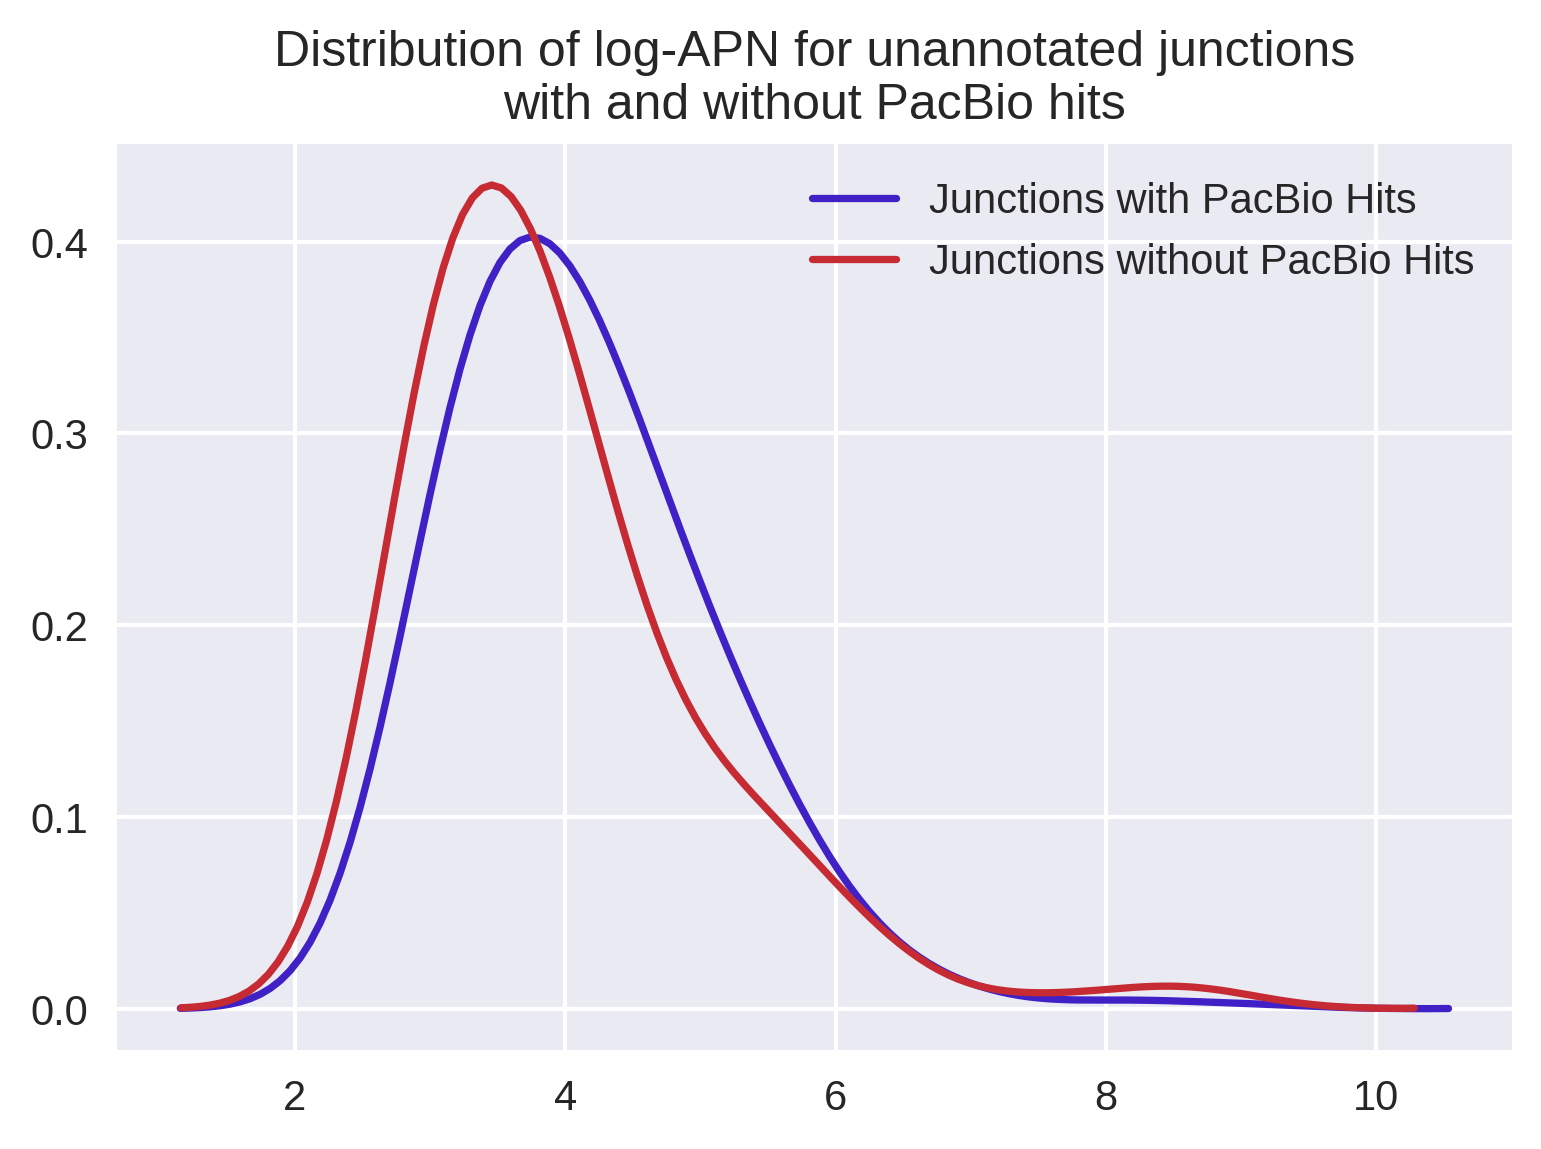

In [12]:

## Plot by feature type

w=numpy.asarray(dfJuncUnannotHit)
z=numpy.asarray(dfJuncUnannotNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(w, bw=0.5, label="Junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Junctions without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for unannotated junctions\nwith and without PacBio hits")
plt.legend


/usr/local/software/anaconda/4-3-1/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


<function matplotlib.pyplot.legend>

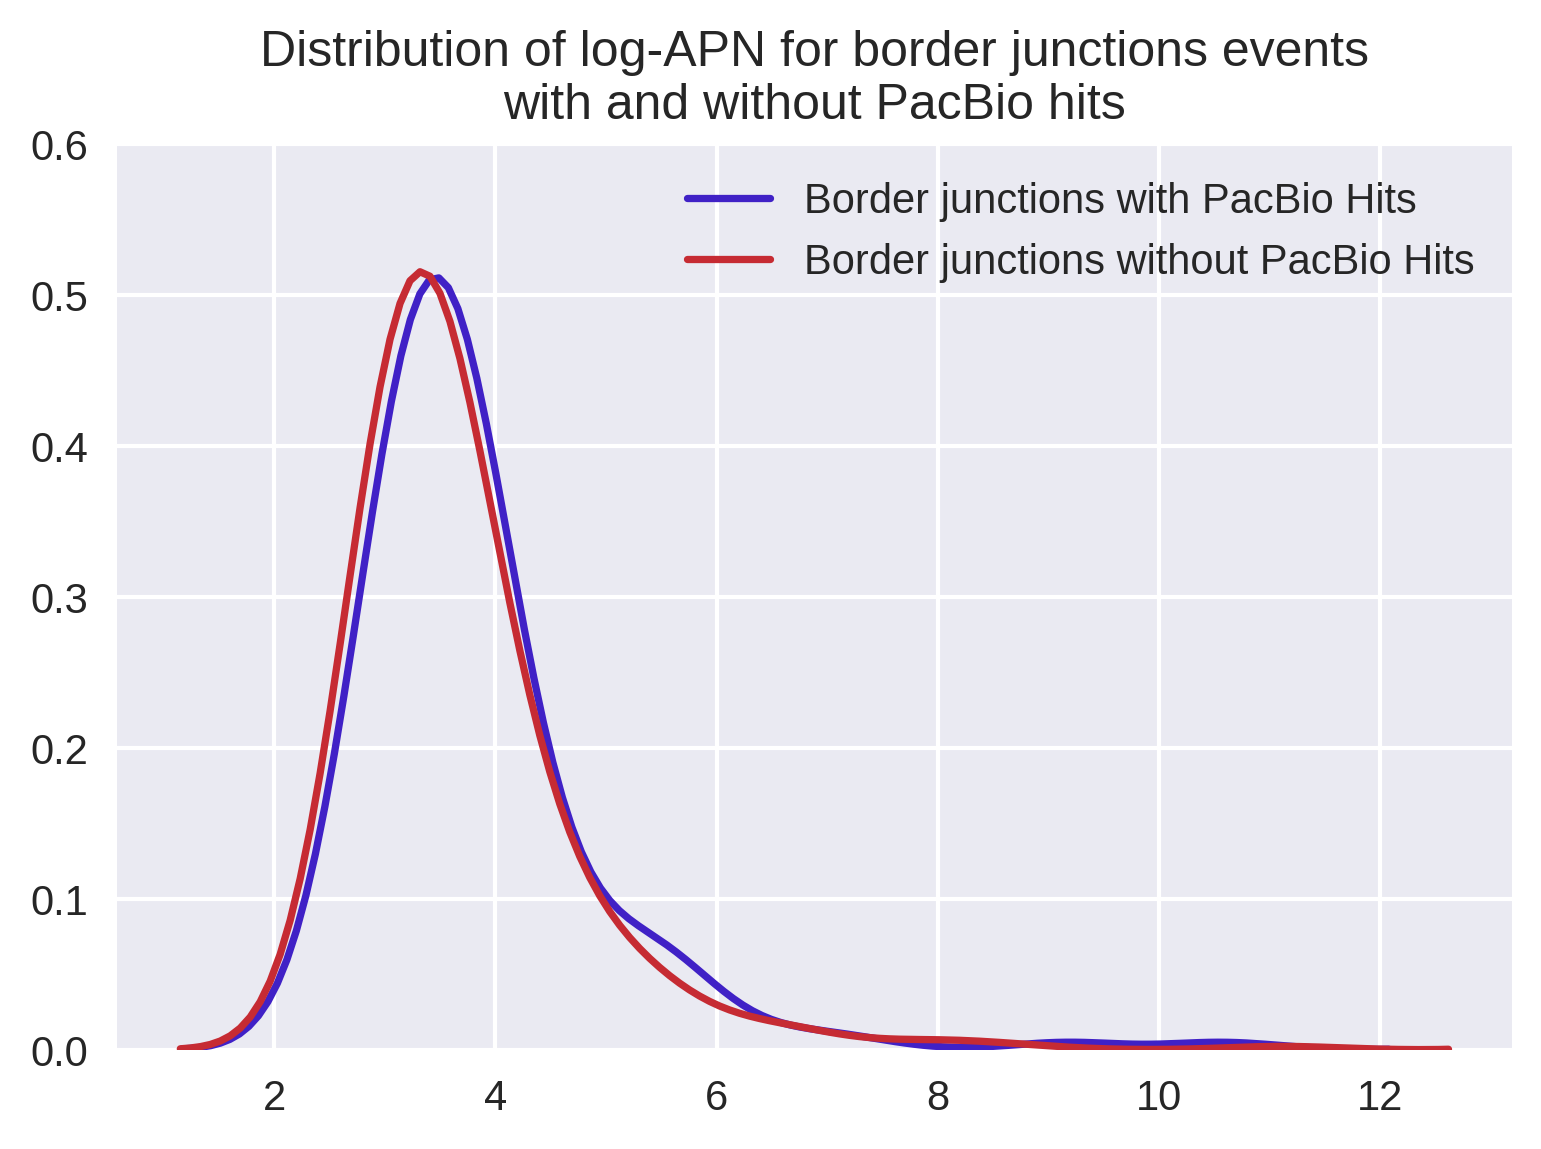

In [14]:
## Plot by feature type

w=numpy.asarray(dfIRHit)
z=numpy.asarray(dfIRNoHit)

#contrast = ["#4021c6", "#c62b33", "#209ac6", "#e57b12"]
#seaborn.palplot(seaborn.color_palette(contrast))

plt.figure(figsize=(6,4), dpi=300)
seaborn.kdeplot(w, bw=0.5, label="Border junctions with PacBio Hits", color="#4021c6")
seaborn.kdeplot(z, bw=0.5, label="Border junctions without PacBio Hits", color="#c62b33")
plt.title("Distribution of log-APN for border junctions events\nwith and without PacBio hits")
plt.ylim(0,0.6)
plt.legend

### Detected features

These are for plots I will use in Figure 3

In [5]:
#import data

mcLab=os.environ["MCLAB"]

## NSCs
dataNSC=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_features_w_annotations.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'), ('flag_feature_on','<f8'), ('flag_junction_annotated','<f8'), 
                               ('flag_intron_retention','<f8'), ('flag_exonskip','<f8'), ('flag_alt_donor','<f8'), 
                               ('flag_alt_acceptor','<f8'), ('num_transcripts','<f8'), ('feature_type','|S30'), 
                               ('flag_multigene','<f8'), ('flag_singleton','<f8')])


# Index   Variable               Description
#  0     feature_id              Variable identifier
#  1     flag_feature_on         0=off, 1=on (APN>0)
#  2     flag_junction_annotated 1=junction is annotated to a transcript. 0=not annotated OR exon OR fragment
#  3     flag_intron_retention   1=IR event, 0=junction OR exon OR fragment
#  4     flag_exonskip           1=exon skipping junction, 0=other event OR exon OR fragment
#  5     flag_alt_donor          1=has alternative donor, 0=ref donor OR exon OR fragment
#  6     flag_alt_acceptor       1=has alternative acceptor, 0=ref acceptor OR exon OR fragment
#  7     num_transcripts         number of transcripts
#  8     feature_type            "fusion","fragment","splicing"
#  9     flag_multigene          1=assigned to multiple genes
# 10     flag_singleton          1=exon group/fusion contains 1 exon. 0=multiexon OR splicing event

# Set up all my counts here. These are the same as above, just with filtering by length.
# Doing this all together here, as this means I can run one step and get all the data I need for plots


### Dectection counts
# Initialize counters
numDtctFusLF=0
numDtctFragLF=0
numDtctEventLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == "fusion" and dataNSCLF[feature][10] == 1:
        numDtctFusLF=numDtctFusLF + 1
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == "fragment" and dataNSCLF[feature][10] == 0:
        numDtctFragLF=numDtctFragLF + 1
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == "splicing"  :
        numDtctEventLF=numDtctEventLF + 1
        
        
print("Number of detected exons: " + str(numDtctFusLF))
print("Number of detected fragments: " + str(numDtctFragLF))
print("Number of detected splicing events: " + str(numDtctEventLF))


# Detection counts - fragments by type
## For fragments, divide into singletons, single-gene fragments, and multi-gene fragments
# Initialize counters
numDtctFragSingletonLF=0
numDtctFragSingleGeneLF=0
numDtctFragMultigeneLF=0
numDtctFragWeirdLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == "fragment":
        if dataNSCLF[feature][10] == 1 and dataNSCLF[feature][9] == 0:
            numDtctFragSingletonLF=numDtctFragSingletonLF + 1
        elif dataNSCLF[feature][10] == 0 and dataNSCLF[feature][9] == 0:
            numDtctFragSingleGeneLF=numDtctFragSingleGeneLF + 1
        elif dataNSCLF[feature][10] == 0 and dataNSCLF[feature][9] == 1:
            numDtctFragMultigeneLF=numDtctFragMultigeneLF + 1
        else:
            numDtctFragWeirdLF=numDtctFragWeirdLF + 1

print("\n")
print("Fragments after filtering by length:")
print("Number of singletons: " + str(numDtctFragSingletonLF))
print("Number of single-gene fragments: " + str(numDtctFragSingleGeneLF))
print("Number of multi-gene fragments: " + str(numDtctFragMultigeneLF))
print("Number of errorenous fragments (should be 0): " + str(numDtctFragWeirdLF))

# Splicing counts - fragments by type
## For splicing events, count by type
# Initialize counters
numDtctAnnotLF=0
numDtctUnAnnotLF=0
numDtctIRLF=0
numDtctWeirdLF=0
numDtctExonSkipLF=0
numDtctAltDonorLF=0
numDtctAltAcceptorLF=0
numDtctAltDonorAcceptorLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == "splicing" :
        if dataNSCLF[feature][2] == 1 and dataNSCLF[feature][3] == 0:
            numDtctAnnotLF=numDtctAnnotLF+1
        elif dataNSCLF[feature][2] == 0 and dataNSCLF[feature][3] == 0:
            numDtctUnAnnotLF=numDtctUnAnnotLF+1
        elif dataNSCLF[feature][2] == 0 and dataNSCLF[feature][3] == 1:
            numDtctIRLF=numDtctIRLF+1
        else:
            numDtctWeird=numDtctWeird+1
        if dataNSCLF[feature][3] == 0:
            if dataNSCLF[feature][4] == 1:
                numDtctExonSkipLF=numDtctExonSkipLF+1
            if dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctAltDonorLF=numDtctAltDonorLF+1
            elif dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctAltAcceptorLF=numDtctAltAcceptorLF+1
            elif dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctAltDonorAcceptorLF=numDtctAltDonorAcceptorLF+1

print("\n")
print("Features detected by major class, after filtering on length:")
print("Number of annotated junctions: " + str(numDtctAnnotLF))
print("Number of unannotated junctions: " + str(numDtctUnAnnotLF))
print("Number of intron retention events: " + str(numDtctIRLF))
print("Number of erroneous events (should be 0): " + str(numDtctWeirdLF))

print("\n")
print("Junctions detected by event type, after filtering on length: ")
print("(note that exon-skipping junctions are not mutually exclusive with alternative donor/acceptor junctions)")
print("Number of exon-skipping junctions: " + str(numDtctExonSkipLF))
print("Number of alternative donor junctions: " + str(numDtctAltDonorLF))
print("Number of alternative acceptor junctions: " + str(numDtctAltAcceptorLF))
print("Number of alternative donor and acceptor junctions: " + str(numDtctAltDonorAcceptorLF))


NameError: name 'dataNSCLF' is not defined

In [6]:
#import data -- with length filtering flags

mcLab=os.environ["MCLAB"]

## NSCs
dataNSCLF=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_features_w_annotations_flagged_short_nomulti.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'), ('flag_feature_on','<f8'), ('flag_junction_annotated','<f8'), 
                               ('flag_intron_retention','<f8'), ('flag_exonskip','<f8'), ('flag_alt_donor','<f8'), 
                               ('flag_alt_acceptor','<f8'), ('num_transcripts','<f8'), ('feature_type','|S30'), 
                               ('flag_multigene','<f8'), ('flag_singleton','<f8'), ('flag_feature_short','<f8')])


# Index   Variable               Description
#  0     feature_id              Variable identifier
#  1     flag_feature_on         0=off, 1=on (APN>0)
#  2     flag_junction_annotated 1=junction is annotated to a transcript. 0=not annotated OR exon OR fragment
#  3     flag_intron_retention   1=IR event, 0=junction OR exon OR fragment
#  4     flag_exonskip           1=exon skipping junction, 0=other event OR exon OR fragment
#  5     flag_alt_donor          1=has alternative donor, 0=ref donor OR exon OR fragment
#  6     flag_alt_acceptor       1=has alternative acceptor, 0=ref acceptor OR exon OR fragment
#  7     num_transcripts         number of transcripts
#  8     feature_type            "fusion","fragment","splicing"
#  9     flag_multigene          1=assigned to multiple genes
# 10     flag_singleton          1=exon group/fusion contains 1 exon. 0=multiexon OR splicing event
# 11     flag_feature_short      1=feature is short (fragments/fusions < minLength (10bp), splicing < read length)

In [8]:
print(dataNSCLF)

[ (b'100009600:1_2', 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, b'splicing', 0.0, 0.0, 0.0)
 (b'100009600:1_3', 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, b'splicing', 0.0, 0.0, 0.0)
 (b'100009600:1_4', 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, b'splicing', 0.0, 0.0, 0.0)
 ...,
 (b'S99_SI:1', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, b'fragment', 0.0, 1.0, 0.0)
 (b'S9_SI', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, b'fusion', 0.0, 1.0, 0.0)
 (b'S9_SI:1', 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, b'fragment', 0.0, 1.0, 0.0)]


In [10]:
# Set up all my counts here. These are the same as above, just with filtering by length.
# Doing this all together here, as this means I can run one step and get all the data I need for plots


### Dectection counts
# Initialize counters
numDtctFusLF=0
numDtctFragLF=0
numDtctEventLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'fusion' and dataNSCLF[feature][11] == 0 and dataNSCLF[feature][10] == 1:
        numDtctFusLF=numDtctFusLF + 1
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'fragment' and dataNSCLF[feature][11] == 0 and dataNSCLF[feature][10] == 0:
        numDtctFragLF=numDtctFragLF + 1
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'splicing' and dataNSCLF[feature][11] == 0:
        numDtctEventLF=numDtctEventLF + 1
        
        
print("Number of detected exons: " + str(numDtctFusLF))
print("Number of detected fragments: " + str(numDtctFragLF))
print("Number of detected splicing events: " + str(numDtctEventLF))


# Detection counts - fragments by type
## For fragments, divide into singletons, single-gene fragments, and multi-gene fragments
# Initialize counters
numDtctFragSingletonLF=0
numDtctFragSingleGeneLF=0
numDtctFragMultigeneLF=0
numDtctFragWeirdLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'fragment' and dataNSCLF[feature][11] == 0:
        if dataNSCLF[feature][10] == 1 and dataNSCLF[feature][9] == 0:
            numDtctFragSingletonLF=numDtctFragSingletonLF + 1
        elif dataNSCLF[feature][10] == 0 and dataNSCLF[feature][9] == 0:
            numDtctFragSingleGeneLF=numDtctFragSingleGeneLF + 1
        elif dataNSCLF[feature][10] == 0 and dataNSCLF[feature][9] == 1:
            numDtctFragMultigeneLF=numDtctFragMultigeneLF + 1
        else:
            numDtctFragWeirdLF=numDtctFragWeirdLF + 1

print("\n")
print("Fragments after filtering by length:")
print("Number of singletons: " + str(numDtctFragSingletonLF))
print("Number of single-gene fragments: " + str(numDtctFragSingleGeneLF))
print("Number of multi-gene fragments: " + str(numDtctFragMultigeneLF))
print("Number of errorenous fragments (should be 0): " + str(numDtctFragWeirdLF))

# Splicing counts - fragments by type
## For splicing events, count by type
# Initialize counters
numDtctAnnotLF=0
numDtctUnAnnotLF=0
numDtctIRLF=0
numDtctWeirdLF=0
numDtctExonSkipLF=0
numDtctAltDonorLF=0
numDtctAltAcceptorLF=0
numDtctAltDonorAcceptorLF=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'splicing' and dataNSCLF[feature][11] == 0:
        if dataNSCLF[feature][2] == 1 and dataNSCLF[feature][3] == 0:
            numDtctAnnotLF=numDtctAnnotLF+1
        elif dataNSCLF[feature][2] == 0 and dataNSCLF[feature][3] == 0:
            numDtctUnAnnotLF=numDtctUnAnnotLF+1
        elif dataNSCLF[feature][2] == 0 and dataNSCLF[feature][3] == 1:
            numDtctIRLF=numDtctIRLF+1
        else:
            numDtctWeird=numDtctWeird+1
        if dataNSCLF[feature][3] == 0:
            if dataNSCLF[feature][4] == 1:
                numDtctExonSkipLF=numDtctExonSkipLF+1
            if dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctAltDonorLF=numDtctAltDonorLF+1
            elif dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctAltAcceptorLF=numDtctAltAcceptorLF+1
            elif dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctAltDonorAcceptorLF=numDtctAltDonorAcceptorLF+1

print("\n")
print("Features detected by major class, after filtering on length:")
print("Number of annotated junctions: " + str(numDtctAnnotLF))
print("Number of unannotated junctions: " + str(numDtctUnAnnotLF))
print("Number of intron retention events: " + str(numDtctIRLF))
print("Number of erroneous events (should be 0): " + str(numDtctWeirdLF))

print("\n")
print("Junctions detected by event type, after filtering on length: ")
print("(note that exon-skipping junctions are not mutually exclusive with alternative donor/acceptor junctions)")
print("Number of exon-skipping junctions: " + str(numDtctExonSkipLF))
print("Number of alternative donor junctions: " + str(numDtctAltDonorLF))
print("Number of alternative acceptor junctions: " + str(numDtctAltAcceptorLF))
print("Number of alternative donor and acceptor junctions: " + str(numDtctAltDonorAcceptorLF))


Number of detected exons: 105891
Number of detected fragments: 39739
Number of detected splicing events: 125614


Fragments after filtering by length:
Number of singletons: 105891
Number of single-gene fragments: 39739
Number of multi-gene fragments: 0
Number of errorenous fragments (should be 0): 0


Features detected by major class, after filtering on length:
Number of annotated junctions: 89734
Number of unannotated junctions: 8404
Number of intron retention events: 27476
Number of erroneous events (should be 0): 0


Junctions detected by event type, after filtering on length: 
(note that exon-skipping junctions are not mutually exclusive with alternative donor/acceptor junctions)
Number of exon-skipping junctions: 16492
Number of alternative donor junctions: 3303
Number of alternative acceptor junctions: 3496
Number of alternative donor and acceptor junctions: 1222


In [12]:
numDtctAnnotNorm=0
numDtctAnnotES=0
numDtctAnnotAD=0
numDtctAnnotAA=0
numDtctAnnotADAA=0
numDtctAnnotESAD=0
numDtctAnnotESAA=0
numDtctAnnotESADAA=0
numDtctUnannotNorm=0
numDtctUnannotES=0
numDtctUnannotAD=0
numDtctUnannotAA=0
numDtctUnannotADAA=0
numDtctUnannotESAD=0
numDtctUnannotESAA=0
numDtctUnannotESADAA=0

for feature in range(0,len(dataNSCLF)):
    if dataNSCLF[feature][1] == 1 and dataNSCLF[feature][8] == b'splicing' and dataNSCLF[feature][11] == 0:
        # Annotated junctions
        if dataNSCLF[feature][2] == 1 and dataNSCLF[feature][3] == 0 :
            # Reference
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 0 :
                numDtctAnnotNorm=numDtctAnnotNorm+1
            # ES
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 0 :
                numDtctAnnotES=numDtctAnnotES+1
            # AD
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctAnnotAD=numDtctAnnotAD+1
            # AA
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctAnnotAA=numDtctAnnotAA+1
            # AD+AA
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctAnnotADAA=numDtctAnnotADAA+1
            # ES+AD
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctAnnotESAD=numDtctAnnotESAD+1
            # ES+AA
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctAnnotESAA=numDtctAnnotESAA+1
            # ES+AD+AA
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctAnnotESADAA=numDtctAnnotESADAA+1
        # Unnnotated junctions
        if dataNSCLF[feature][2] == 0 and dataNSCLF[feature][3] == 0 :
            # Reference
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 0 :
                numDtctUnannotNorm=numDtctUnannotNorm+1
            # ES
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 0 :
                numDtctUnannotES=numDtctUnannotES+1
            # AD
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctUnannotAD=numDtctUnannotAD+1
            # AA
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctUnannotAA=numDtctUnannotAA+1
            # AD+AA
            if dataNSCLF[feature][4] == 0 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctUnannotADAA=numDtctUnannotADAA+1
            # ES+AD
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 0 :
                numDtctUnannotESAD=numDtctUnannotESAD+1
            # ES+AA
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 0 and dataNSCLF[feature][6] == 1 :
                numDtctUnannotESAA=numDtctUnannotESAA+1
            # ES+AD+AA
            if dataNSCLF[feature][4] == 1 and dataNSCLF[feature][5] == 1 and dataNSCLF[feature][6] == 1 :
                numDtctUnannotESADAA=numDtctUnannotESADAA+1

print("Junctions detected by event type, after filtering on length: ")
print("Annotated reference junctions: " + str(numDtctAnnotNorm))
print("Annotated ES junctions: " + str(numDtctAnnotES))
print("Annotated AD junctions: " + str(numDtctAnnotAD))
print("Annotated AA junctions: " + str(numDtctAnnotAA))
print("Annotated AD+AA junctions: " + str(numDtctAnnotADAA))
print("Annotated ES+AD junctions: " + str(numDtctAnnotESAD))
print("Annotated ES+AA junctions: " + str(numDtctAnnotESAA))
print("Annotated ES+AD+AA junctions: " + str(numDtctAnnotESADAA))

print("Unannotated reference junctions: " + str(numDtctUnannotNorm))
print("Unannotated ES junctions: " + str(numDtctUnannotES))
print("Unannotated AD junctions: " + str(numDtctUnannotAD))
print("Unannotated AA junctions: " + str(numDtctUnannotAA))
print("Unannotated AD+AA junctions: " + str(numDtctUnannotADAA))
print("Unannotated ES+AD junctions: " + str(numDtctUnannotESAD))
print("Unannotated ES+AA junctions: " + str(numDtctUnannotESAA))
print("Unannotated ES+AD+AA junctions: " + str(numDtctUnannotESADAA))



Junctions detected by event type, after filtering on length: 
Annotated reference junctions: 75894
Annotated ES junctions: 7426
Annotated AD junctions: 1969
Annotated AA junctions: 2087
Annotated AD+AA junctions: 936
Annotated ES+AD junctions: 659
Annotated ES+AA junctions: 642
Annotated ES+AD+AA junctions: 121
Unannotated reference junctions: 386
Unannotated ES junctions: 6411
Unannotated AD junctions: 133
Unannotated AA junctions: 169
Unannotated AD+AA junctions: 72
Unannotated ES+AD junctions: 542
Unannotated ES+AA junctions: 598
Unannotated ES+AD+AA junctions: 93


(105891, 39739, 125614)


(array([ 0.175,  1.175,  2.175]), <a list of 3 Text xticklabel objects>)

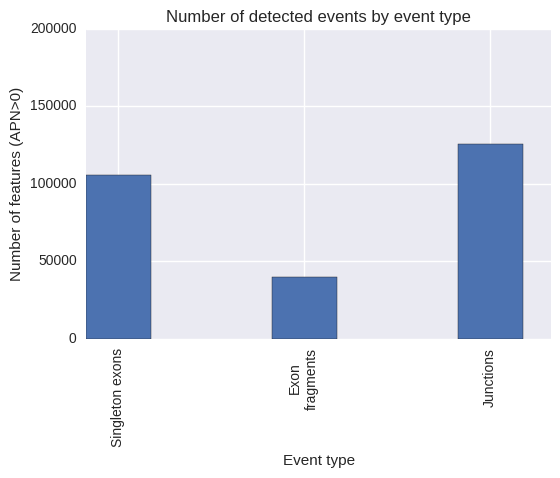

In [91]:
# Plot detected features - before and after length filtering

N = 3
onCountLF=(numDtctFusLF,numDtctFragLF,numDtctEventLF)

print onCountLF

ind = numpy.arange(N)
width = 0.35

fig, ax = plt.subplots()

rectsLF = ax.bar(ind,onCountLF,width,color="b")

# Set axis labels and title

plt.ylim(0,200000)
ax.set_ylabel('Number of features (APN>0)')
#ax.set_yscale('log')
ax.set_xlabel('Event type')
ax.set_title('Number of detected events by event type')
ax.set_xticks(ind + 0.5*width) 
ax.set_xticklabels(('Singleton exons','Exon\nfragments','Junctions')) 
plt.xticks(rotation='vertical')

(105891, 39739)


(array([ 0.175,  1.175]), <a list of 2 Text xticklabel objects>)

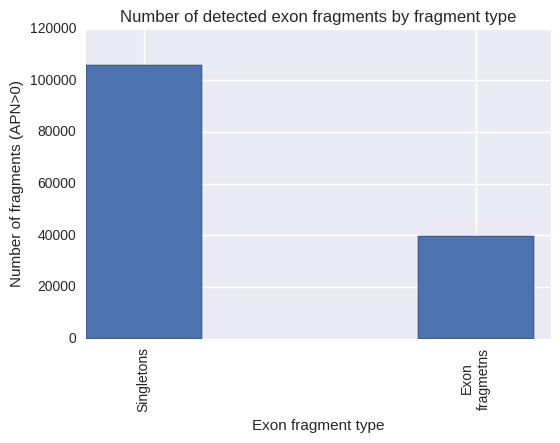

In [94]:
# Plot detected features

N = 2
onCountLF=(numDtctFragSingletonLF,numDtctFragSingleGeneLF)

ind = numpy.arange(N)
width = 0.35

print onCountLF

fig, ax = plt.subplots()
rectsLF = ax.bar(ind,onCountLF,width,color="b")

# Set axis labels and title

#plt.ylim(0,250000)
ax.set_ylabel('Number of fragments (APN>0)')
#ax.set_yscale('log')
ax.set_xlabel('Exon fragment type')
ax.set_title('Number of detected exon fragments by fragment type')
ax.set_xticks(ind + 0.5*width) 
ax.set_xticklabels(('Singletons','Exon\nfragmetns')) 
plt.xticks(rotation='vertical')

(89734, 8404, 27476, 0, 16492, 3303, 3496, 1222)


(array([ 0.375,  1.375,  2.375,  3.375,  4.375,  5.375,  6.375,  7.375]),
 <a list of 8 Text xticklabel objects>)

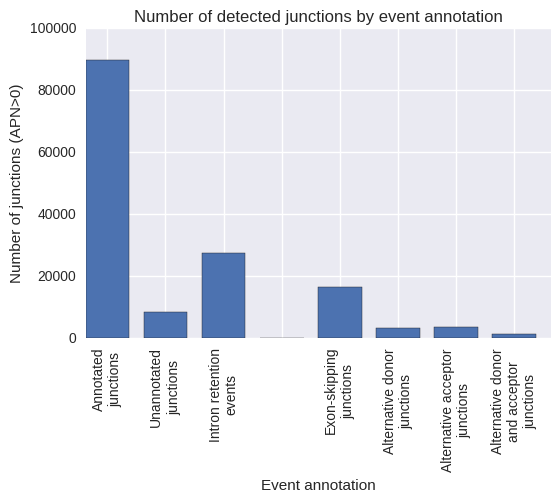

In [96]:
# Plot detected splicing events

N = 8
onCountLF=(numDtctAnnotLF,numDtctUnAnnotLF,numDtctIRLF,0,numDtctExonSkipLF,numDtctAltDonorLF,numDtctAltAcceptorLF,numDtctAltDonorAcceptorLF)

print onCountLF

ind = numpy.arange(N)
width = 0.75

fig, ax = plt.subplots()
rectsLF = ax.bar(ind,onCountLF,width,color="b")

# Set axis labels and title

plt.ylim(0,100000)
ax.set_ylabel('Number of junctions (APN>0)')
#ax.set_yscale('log')
ax.set_xlabel('Event annotation')
ax.set_title('Number of detected junctions by event annotation')
ax.set_xticks(ind + 0.5*width) 
ax.set_xticklabels(('Annotated\njunctions','Unannotated\njunctions','Intron retention\nevents','','Exon-skipping\njunctions','Alternative donor\njunctions','Alternative acceptor\njunctions','Alternative donor\nand acceptor\njunctions')) 
plt.xticks(rotation='vertical')

(89734, 8404, 27476)


(array([ 0.05,  1.05,  2.05]), <a list of 3 Text xticklabel objects>)

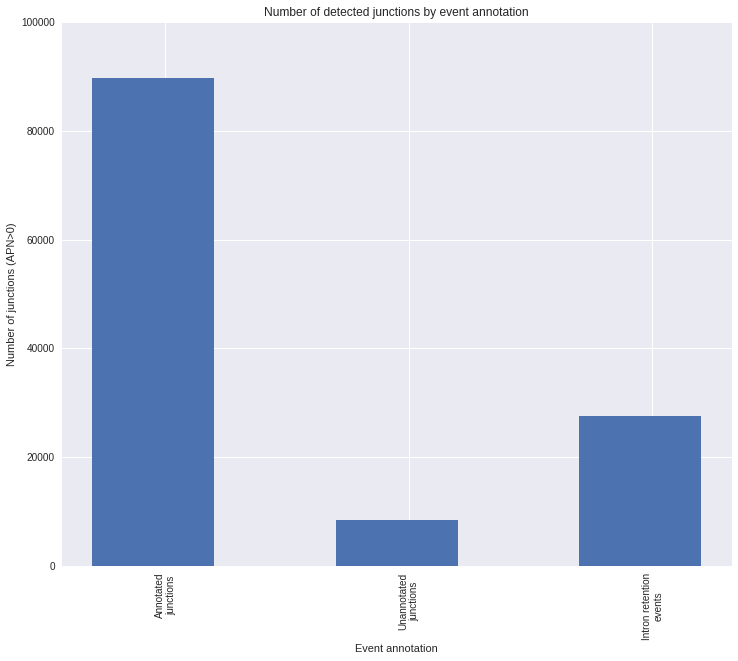

In [21]:
# Plot detected splicing events

N = 3
onCountLF=(numDtctAnnotLF,numDtctUnAnnotLF,numDtctIRLF)

print(onCountLF)

ind = numpy.arange(N)
width = 0.5

fig, ax = plt.subplots(figsize=(12,10))
rectsLF = ax.bar(ind,onCountLF,width,color="b")

# Set axis labels and title

plt.ylim(0,100000)
ax.set_ylabel('Number of junctions (APN>0)')
#ax.set_yscale('log')
ax.set_xlabel('Event annotation')
ax.set_title('Number of detected junctions by event annotation')
ax.set_xticks(ind + 0.1*width) 
ax.set_xticklabels(('Annotated\njunctions','Unannotated\njunctions','Intron retention\nevents')) 
plt.xticks(rotation='vertical')

In [97]:
### Make a scatterplot comparing the number of isoforms for gene against the proportion of isoforms with unique features

mcLab=os.environ["MCLAB"]

## Feature info
fus2frag=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_fragments_per_region_nomulti.csv', delimiter=",", names=True,
                        dtype=[('fusion_id','|S30'),('num_frags_per_fus','<f8'),('num_frags_per_fus_lf','<f8'),
                        ('num_dtct_frags_per_fus','<f8'),('num_dtct_frags_per_fus_lf','<f8')])



# Index  Variable 
# 0     fusion_id
# 1     num_frags_per_fus
# 2     um_frags_per_fus_lf
# 3     num_dtct_frags_per_fus
# 4     num_dtct_frags_per_fus_lf


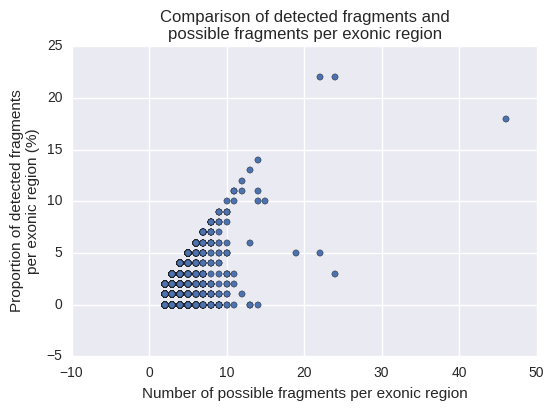

In [103]:
## PLot detected vs possible fragment for multifragment regions
## First for all

numPossFragsLF=[]
numDtctFragsLF=[]

for region in range(0,len(fus2frag)):
    if fus2frag[region][2] > 1:
        numPossFragsLF.append(fus2frag[region][2])
        numDtctFragsLF.append(fus2frag[region][4])
    
fig,ax = plt.subplots()
pltFus2FragLF = ax.scatter(numPossFragsLF,numDtctFragsLF)

#plt.xlim(-10,150)
#plt.ylim(-10,110)
ax.set_ylabel('Proportion of detected fragments\nper exonic region (%)')
ax.set_xlabel('Number of possible fragments per exonic region')
ax.set_title('Comparison of detected fragments and\npossible fragments per exonic region')

plt.show()

24447
24447


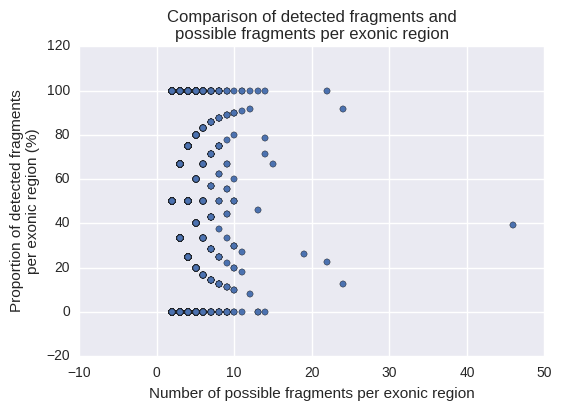

In [105]:
## PLot detected vs possible fragment for multifragment regions
## First for all

numPossFragsLF=[]
numDtctFragsLF=[]

for region in range(0,len(fus2frag)):
    if fus2frag[region][2] > 1:
        numPossFragsLF.append(fus2frag[region][2])
        numDtctFragsLF.append(fus2frag[region][4]/fus2frag[region][2]*100)

print len(numPossFragsLF)
print len(numDtctFragsLF)
        
fig,ax = plt.subplots()
pltFus2FragLF = ax.scatter(numPossFragsLF,numDtctFragsLF)

#plt.xlim(-10,150)
#plt.ylim(-10,110)
ax.set_ylabel('Proportion of detected fragments\nper exonic region (%)')
ax.set_xlabel('Number of possible fragments per exonic region')
ax.set_title('Comparison of detected fragments and\npossible fragments per exonic region')

plt.show()

## Transcript specificity counts and Fig4

In [24]:
#import data -- retained features with info, post-gene-filtering

mcLab=os.environ["MCLAB"]

## Feature info
featInfo=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_features_retained_with_info_gene_filtered_nomulti.csv', delimiter=",", names=True,
                        dtype=[('feature_id','|S30'),('flag_feature_on','<f8'),('feature_type','|S30'),
                        ('flag_singleton','<f8'),('xscripts_per_feature','<f8'),('flag_multigene','<f8'),
                        ('flag_feature_unique','<f8'),('flag_feature_common','<f8'),('flag_feature_constitutive','<f8')])

# Index  Variable 
# 0      feature_id
# 1      flag_feature_on
# 2      feature_type
# 3      flag_singleton
# 4      xscripts_per_feature
# 5      flag_multigene
# 6      flag_feature_unique
# 7      flag_feature_common
# 8      flag_feature_constitutive

## Unique counts by transcript
countByXS=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_uniq_features_by_xscript_gene_filtered_nomulti.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'),('num_unique_features','<f8'),('num_unique_features_dtct','<f8'),
                        ('num_uniq_events','<f8'),('num_uniq_events_dtct','<f8'),('num_uniq_frag_singletons','<f8'),
                        ('num_uniq_frag_singletons_dtct','<f8'),('num_uniq_frag_nonsingl','<f8'),('num_uniq_frag_nonsingl_dtct','<f8'),
                        ('num_uniq_fus_singletons','<f8'),('num_uniq_fus_singletons_dtct','<f8'),('num_uniq_fus_nonsingl','<f8'),
                        ('num_uniq_fus_nonsingl_dtct','<f8')])

## Unique counts by gene
countByGene=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_uniq_features_by_gene_gene_filtered_nomulti.csv', delimiter=",", names=True,
                        dtype=[('gene_id','|S30'),('num_unique_features','<f8'),('num_unique_features_dtct','<f8'),
                        ('num_uniq_events','<f8'),('num_uniq_events_dtct','<f8'),('num_uniq_frag_singletons','<f8'),
                        ('num_uniq_frag_singletons_dtct','<f8'),('num_uniq_frag_nonsingl','<f8'),('num_uniq_frag_nonsingl_dtct','<f8'),
                        ('num_uniq_fus_singletons','<f8'),('num_uniq_fus_singletons_dtct','<f8'),('num_uniq_fus_nonsingl','<f8'),
                        ('num_uniq_fus_nonsingl_dtct','<f8')])

# Index  Variable 
# 0      transcript_id / gene_id
# 1      num_unique_features
# 2      num_unique_features_dtct
# 3      num_uniq_events
# 4      num_uniq_events_dtct
# 5      num_uniq_frag_singletons
# 6      num_uniq_frag_singletons_dtct
# 7      num_uniq_frag_nonsingl
# 8      num_uniq_frag_nonsingl_dtct
# 9      num_uniq_fus_singletons
# 10     num_uniq_fus_singletons_dtct
# 11     num_uniq_fus_nonsingl
# 12     num_uniq_fus_nonsingl_dtct


In [25]:
# Set up data sets for making plots to explore distribution of features

# Stacked barplot data

# I want: splicing_on + splicing_off, fragment_on+fragment_off
eventUniqOn=0
eventUniqOff=0
eventCmmnOn=0
eventCmmnOff=0
eventCnstOn=0
eventCnstOff=0

fragSEUniqOn=0
fragSEUniqOff=0
fragSECmmnOn=0
fragSECmmnOff=0
fragSECnstOn=0
fragSECnstOff=0
fragSEXSOn=0
fragSEXSOff=0


fragMEUniqOn=0
fragMEUniqOff=0
fragMECmmnOn=0
fragMECmmnOff=0
fragMECnstOn=0
fragMECnstOff=0

for feat in range(0,len(featInfo)):
    if featInfo[feat][2] == b"splicing":
        if featInfo[feat][6] == 1 and featInfo[feat][1] == 1:
            eventUniqOn=eventUniqOn+1
        elif featInfo[feat][6] == 1 and featInfo[feat][1] == 0:
            eventUniqOff=eventUniqOff+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 1:
            eventCmmnOn=eventCmmnOn+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 0:
            eventCmmnOff=eventCmmnOff+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 1:
            eventCnstOn=eventCnstOn+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 0:
            eventCnstOff=eventCnstOff+1
    elif featInfo[feat][2] == b"fragment" and featInfo[feat][3] == 1:
        if featInfo[feat][6] == 1 and featInfo[feat][1] == 1:
            if featInfo[feat][8] == 0:
                fragSEUniqOn=fragSEUniqOn+1
            else:
                fragSEXSOn=fragSEXSOn+1
        elif featInfo[feat][6] == 1 and featInfo[feat][1] == 0:
            if featInfo[feat][8] == 0:
                fragSEUniqOff=fragSEUniqOff+1
            else:
                fragSEXSOff=fragSEXSOff+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 1:
            fragSECmmnOn=fragSECmmnOn+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 0:
            fragSECmmnOff=fragSECmmnOff+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 1:
            fragSECnstOn=fragSECnstOn+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 0:
            fragSECnstOff=fragSECnstOff+1
    elif featInfo[feat][2] == b"fragment" and featInfo[feat][3] == 0:
        if featInfo[feat][6] == 1 and featInfo[feat][1] == 1:
            fragMEUniqOn=fragMEUniqOn+1
        elif featInfo[feat][6] == 1 and featInfo[feat][1] == 0:
            fragMEUniqOff=fragMEUniqOff+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 1:
            fragMECmmnOn=fragMECmmnOn+1
        elif featInfo[feat][7] == 1 and featInfo[feat][1] == 0:
            fragMECmmnOff=fragMECmmnOff+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 1:
            fragMECnstOn=fragMECnstOn+1
        elif featInfo[feat][8] == 1 and featInfo[feat][1] == 0:
            fragMECnstOff=fragMECnstOff+1


            
print("Number of unique features by specificity and feature type:")
print("Unique splicing events detected: " + str(eventUniqOn) + " of " + str(eventUniqOn+eventUniqOff))
print("Common splicing events detected: " + str(eventCmmnOn) + " of " + str(eventCmmnOn+eventCmmnOff))
print("Constitutive splicing events detected: " + str(eventCnstOn) + " of " + str(eventCnstOn+eventCnstOff))
print("\n")
print("Unique singletons (fragments) detected: " + str(fragSEUniqOn) + " of " + str(fragSEUniqOn+fragSEUniqOff))
print("Common singletons (fragments) detected: " + str(fragSECmmnOn) + " of " + str(fragSECmmnOn+fragSECmmnOff))
print("Constitutive singletons (fragments) detected: " + str(fragSECnstOn) + " of " + str(fragSECnstOn+fragSECnstOff))
print("Exons of mono-xs genes detected: " + str(fragSEXSOn) + " of " + str(fragSEXSOn+fragSEXSOff))
print("\n")
print("Unique exon fragments detected: " + str(fragMEUniqOn) + " of " + str(fragMEUniqOn+fragMEUniqOff))
print("Common exon fragments detected: " + str(fragMECmmnOn) + " of " + str(fragMECmmnOn+fragMECmmnOff))
print("Constitutive exon fragments detected: " + str(fragMECnstOn) + " of " + str(fragMECnstOn+fragMECnstOff))
print("\n")


Number of unique features by specificity and feature type:
Unique splicing events detected: 24984 of 59986
Common splicing events detected: 23968 of 49640
Constitutive splicing events detected: 40680 of 68140


Unique singletons (fragments) detected: 7328 of 13504
Common singletons (fragments) detected: 16923 of 24530
Constitutive singletons (fragments) detected: 56651 of 74821
Exons of mono-xs genes detected: 24989 of 33463


Unique exon fragments detected: 6468 of 11581
Common exon fragments detected: 19126 of 29771
Constitutive exon fragments detected: 14145 of 18833




### Figure 5 -- detection of transcripts

Getting counts for xs/gene * %detected stacked plot. Then I need to regenerate the density plot of % detected features

In [115]:
#import data

mcLab=os.environ["MCLAB"]

## NSCs
dataNSC=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_xscripts_per_gene_perc_total_detected_nomulti.csv', delimiter=",", names=True,
                        dtype=[('gene_id','|S30'),('num_xscript_min_perc_on_100','<f8'),
                               ('num_xscript_min_perc_on_75','<f8'),('num_xscript_min_perc_on_50','<f8'),
                               ('num_xscript_min_perc_on_25','<f8'),('num_xscript_min_perc_on_0','<f8')])


# Index   Variable
#  0      gene_id
#  1      num_xscript_min_perc_on_100
#  2      num_xscript_min_perc_on_75
#  3      num_xscript_min_perc_on_50
#  4      num_xscript_min_perc_on_25
#  5      num_xscript_min_perc_on_0


In [116]:
### Set up bins

perc100xs1=0
perc100xs2=0
perc100xs3=0
perc100xs4=0
perc100xs5=0
perc100xs10=0
perc100xs20=0
perc100xs25=0

perc75xs1=0
perc75xs2=0
perc75xs3=0
perc75xs4=0
perc75xs5=0
perc75xs10=0
perc75xs20=0
perc75xs25=0

perc50xs1=0
perc50xs2=0
perc50xs3=0
perc50xs4=0
perc50xs5=0
perc50xs10=0
perc50xs20=0
perc50xs25=0

perc25xs1=0
perc25xs2=0
perc25xs3=0
perc25xs4=0
perc25xs5=0
perc25xs10=0
perc25xs20=0
perc25xs25=0

perc0xs1=0
perc0xs2=0
perc0xs3=0
perc0xs4=0
perc0xs5=0
perc0xs10=0
perc0xs20=0
perc0xs25=0

for gene in range(0,len(dataNSC)):
    if dataNSC[gene][1] == 1:
        perc100xs1=perc100xs1+1
    elif dataNSC[gene][1] == 2:
        perc100xs2=perc100xs2+1
    elif dataNSC[gene][1] == 3:
        perc100xs3=perc100xs3+1
    elif dataNSC[gene][1] == 4:
        perc100xs4=perc100xs4+1
    elif dataNSC[gene][1] == 5:
        perc100xs5=perc100xs5+1
    elif dataNSC[gene][1] >= 6 and dataNSC[gene][1] <= 10:
        perc100xs10=perc100xs10+1
    elif dataNSC[gene][1] >= 11 and dataNSC[gene][1] <= 20:
        perc100xs20=perc100xs20+1
    elif dataNSC[gene][1] > 25:
        perc100xs25=perc100xs25+1
    if dataNSC[gene][2] == 1:
        perc75xs1=perc75xs1+1
    elif dataNSC[gene][2] == 2:
        perc75xs2=perc75xs2+1
    elif dataNSC[gene][2] == 3:
        perc75xs3=perc75xs3+1
    elif dataNSC[gene][2] == 4:
        perc75xs4=perc75xs4+1
    elif dataNSC[gene][2] == 5:
        perc75xs5=perc75xs5+1
    elif dataNSC[gene][2] >= 6 and dataNSC[gene][2] <= 10:
        perc75xs10=perc75xs10+1
    elif dataNSC[gene][2] >= 11 and dataNSC[gene][2] <= 20:
        perc75xs20=perc75xs20+1
    elif dataNSC[gene][2] > 20:
        perc75xs25=perc75xs25+1
    if dataNSC[gene][3] == 1:
        perc50xs1=perc50xs1+1
    elif dataNSC[gene][3] == 2:
        perc50xs2=perc50xs2+1
    elif dataNSC[gene][3] == 3:
        perc50xs3=perc50xs3+1
    elif dataNSC[gene][3] == 4:
        perc50xs4=perc50xs4+1
    elif dataNSC[gene][3] == 5:
        perc50xs5=perc50xs5+1
    elif dataNSC[gene][3] >= 6 and dataNSC[gene][3] <= 10:
        perc50xs10=perc50xs10+1
    elif dataNSC[gene][3] >= 11 and dataNSC[gene][3] <= 20:
        perc50xs20=perc50xs20+1
    elif dataNSC[gene][3] > 20:
        perc50xs25=perc50xs25+1
    if dataNSC[gene][4] == 1:
        perc25xs1=perc25xs1+1
    elif dataNSC[gene][4] == 2:
        perc25xs2=perc25xs2+1
    elif dataNSC[gene][4] == 3:
        perc25xs3=perc25xs3+1
    elif dataNSC[gene][4] == 4:
        perc25xs4=perc25xs4+1
    elif dataNSC[gene][4] == 5:
        perc25xs5=perc25xs5+1
    elif dataNSC[gene][4] >= 6 and dataNSC[gene][4] <= 10:
        perc25xs10=perc25xs10+1
    elif dataNSC[gene][4] >= 11 and dataNSC[gene][4] <= 20:
        perc25xs20=perc25xs20+1
    elif dataNSC[gene][4] > 20:
        perc25xs25=perc25xs25+1
    if dataNSC[gene][5] == 1:
        perc0xs1=perc0xs1+1
    elif dataNSC[gene][5] == 2:
        perc0xs2=perc0xs2+1
    elif dataNSC[gene][5] == 3:
        perc0xs3=perc0xs3+1
    elif dataNSC[gene][5] == 4:
        perc0xs4=perc0xs4+1
    elif dataNSC[gene][5] == 5:
        perc0xs5=perc0xs5+1
    elif dataNSC[gene][5] >= 6 and dataNSC[gene][5] <= 10:
        perc0xs10=perc0xs10+1
    elif dataNSC[gene][5] >= 11 and dataNSC[gene][5] <= 20:
        perc0xs20=perc0xs20+1
    elif dataNSC[gene][5] > 20:
        perc0xs25=perc0xs25+1

perc100xs=[perc100xs1,perc100xs2,perc100xs3,perc100xs4,perc100xs5,perc100xs10,perc100xs20,perc100xs25]
perc75xs=[perc75xs1,perc75xs2,perc75xs3,perc75xs4,perc75xs5,perc75xs10,perc75xs20,perc75xs25]
perc50xs=[perc50xs1,perc50xs2,perc50xs3,perc50xs4,perc50xs5,perc50xs10,perc50xs20,perc50xs25]
perc25xs=[perc25xs1,perc25xs2,perc25xs3,perc25xs4,perc25xs5,perc25xs10,perc25xs20,perc25xs25]
perc0xs=[perc0xs1,perc0xs2,perc0xs3,perc0xs4,perc0xs5,perc0xs10,perc0xs20,perc0xs25]

print perc100xs
print perc75xs
print perc50xs
print perc25xs
print perc0xs

[4761, 1777, 628, 367, 175, 223, 37, 3]
[4405, 2138, 1081, 838, 523, 1227, 404, 71]
[4980, 3222, 1314, 1153, 649, 1640, 525, 108]
[5867, 4368, 1601, 1507, 766, 2043, 667, 131]
[6742, 5523, 1920, 2017, 942, 2684, 874, 173]


Density plot of % detected

In [117]:
mcLab=os.environ["MCLAB"]

## Transcripts to compare
xsCompare=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_transcripts_for_comparison_nomulti.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'),('num_unique_features_catalog','<f8'),('num_unique_features_dtct_catalog','<f8'),\
('flag_xscript_catalog_has_uniq','<f8'),('perc_xscript_catalog_uniq','<f8'),\
('num_unique_features_exp','<f8'),('num_unique_features_dtct_exp','<f8'),\
('flag_xscript_exp_has_uniq','<f8'),('perc_xscript_exp_uniq','<f8'),\
('num_unique_features_prob','<f8'),('num_unique_features_dtct_prob','<f8'),\
('perc_xscript_prob_uniq','<f8'),('flag_xscript_prob_has_uniq','<f8'),\
('flag_xscript_in_catalog','<f8'),('flag_xscript_expressed','<f8'),\
('flag_xscript_probable','<f8')])



# Index  Variable 
# 0     transcript_id
# 1     num_unique_features_catalog
# 2     num_unique_features_dtct_catalog
# 3     flag_xscript_catalog_has_uniq
# 4     perc_xscript_catalog_uniq
# 5     num_unique_features_exp
# 6     num_unique_features_dtct_exp
# 7     flag_xscript_exp_has_uniq
# 8     perc_xscript_exp_uniq
# 9     num_unique_features_prob
# 10    num_unique_features_dtct_prob
# 11    perc_xscript_prob_uniq
# 12    flag_xscript_prob_has_uniq
# 13    flag_xscript_in_catalog
# 14    flag_xscript_expressed
# 15    flag_xscript_probable



## Probable transcripts in bins
xsProb=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_transcripts_by_perc_unique_detected_nomulti.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'),('num_total_features','<f8'),('num_features_dtct','<f8'),
('num_unique_features','<f8'),('num_unique_features_dtct','<f8'),('perc_features_dtct','<f8'),
('perc_unique_features_dtct','<f8'),('flag_xscript_has_features','<f8'),('flag_xscript_has_dtct_features','<f8'),
('flag_xscript_has_unique','<f8'),('flag_xscript_has_unique_dtct','<f8'),('bin_xscript_perc_uniq_dtct','|S30')])


# Index  Variable 
# 0     transcript_id
# 1     num_total_features
# 2     num_features_dtct
# 3     num_unique_features
# 4     num_unique_features_dtct
# 5     perc_features_dtct
# 6     perc_unique_features_dtct
# 7     flag_xscript_has_features
# 8     flag_xscript_has_dtct_features
# 9     flag_xscript_has_unique
# 10    flag_xscript_has_unique_dtct
# 11    bin_xscript_perc_uniq_dtct

In [118]:
### Plot of expressed transcripts, # with any detected, # no unique detected.
### I want to look at the % of total detected features per transcript

        
### Number of expressed transcripts in each %uniq bin
xsTotalPercBin1=0
xsTotalPercBin2=0
xsTotalPercBin3=0
xsTotalPercBin4=0
xsTotalPercBin5=0
xsTotalPercBin6=0
xsTotalPercBinOops=0

for xs in range(0,len(xsProb)):
    if xsProb[xs][8] == 1:
        if xsProb[xs][5] == 0:
            xsTotalPercBin1=xsTotalPercBin1+1
        elif xsProb[xs][5] < 0.25:
            xsTotalPercBin2=xsTotalPercBin2+1
        elif xsProb[xs][5] < 0.5:

            xsTotalPercBin3=xsTotalPercBin3+1
        elif xsProb[xs][5] < 0.75:
            xsTotalPercBin4=xsTotalPercBin4+1
        elif xsProb[xs][5] < 1:
            xsTotalPercBin5=xsTotalPercBin5+1
        elif xsProb[xs][5] == 1:
            xsTotalPercBin6=xsTotalPercBin6+1
        else:
            xsTotalPercBinOops=xsTotalPercBinOops+1

        
print xsTotalPercBin1
print xsTotalPercBin2
print xsTotalPercBin3
print xsTotalPercBin4
print xsTotalPercBin5
print xsTotalPercBin6
print xsTotalPercBinOops



### Plot density of expressed xscripts by proportion of detected total features
xsPercDtctDens=[]
for xs in range(0,len(xsProb)):
    if xsProb[xs][8] == 1:
        xsPercDtctDens.append(xsProb[xs][5])
        

# Index  Variable 
# 0     transcript_id
# 1     num_total_features
# 2     num_features_dtct
# 3     num_unique_features
# 4     num_unique_features_dtct
# 5     perc_features_dtct
# 6     perc_unique_features_dtct
# 7     flag_xscript_has_features
# 8     flag_xscript_has_dtct_features
# 9     flag_xscript_has_unique
# 10    flag_xscript_has_unique_dtct
# 11    bin_xscript_perc_uniq_dtct

0
15963
11689
11261
19888
14734
0


In [120]:
import scipy
from scipy.stats import gaussian_kde


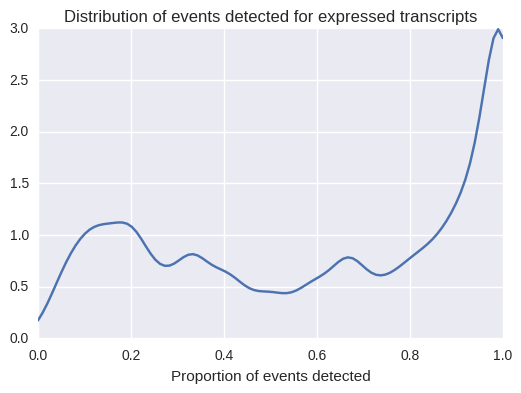

In [127]:
## Density plot for detected unique features

num_bins = numpy.linspace(0,1,100)
densUniq = gaussian_kde(xsPercDtctDens)
densUniq.covariance_factor = lambda : .1
densUniq._compute_covariance()
plt.plot(num_bins,densUniq(num_bins))
plt.xlabel('Proportion of events detected')
densityTitle='Distribution of events detected for expressed transcripts'
plt.title(densityTitle)

In [122]:
### Plot of expressed transcripts, # with unique detected, # no unique detected, # no unique

xsNonResolv=0
xsResolvNoUniq=0
xsResolvUniq=0

for xs in range(0,len(xsProb)):
    if xsProb[xs][9] == 1 :
        if xsProb[xs][10] == 1 :
            xsResolvUniq=xsResolvUniq+1
        else:
            xsResolvNoUniq=xsResolvNoUniq+1
    else:
        xsNonResolv=xsNonResolv+1


### Plot density of expressed xscripts by proportion of detected unique features
xsPercUniqDtctDens=[]
for xs in range(0,len(xsProb)):
    if xsProb[xs][10] == 1:
        xsPercUniqDtctDens.append(xsProb[xs][6])

### Number of expressed transcripts in each %uniq bin
xsUniqPercBin1=0
xsUniqPercBin2=0
xsUniqPercBin3=0
xsUniqPercBin4=0
xsUniqPercBin5=0
xsUniqPercBin6=0
xsUniqPercBin7=0
xsUniqPercBinOops=0

for xs in range(0,len(xsProb)):
    if xsProb[xs][11] == "no unique":
        xsUniqPercBin1=xsUniqPercBin1+1
    elif xsProb[xs][11] == "0%":
        xsUniqPercBin2=xsUniqPercBin2+1
    elif xsProb[xs][11] == "0-25%":
        xsUniqPercBin3=xsUniqPercBin3+1
    elif xsProb[xs][11] == "25-50%":
        xsUniqPercBin4=xsUniqPercBin4+1
    elif xsProb[xs][11] == "50-75%":
        xsUniqPercBin5=xsUniqPercBin5+1
    elif xsProb[xs][11] == "75-100%":
        xsUniqPercBin6=xsUniqPercBin6+1
    elif xsProb[xs][11] == "100%":
        xsUniqPercBin7=xsUniqPercBin7+1
    else:
        xsUniqPercBinOops=xsUniqPercBinOops+1

        
print str(xsUniqPercBin1) + " no unique"
print str(xsUniqPercBin2) + " 0%"
print str(xsUniqPercBin3) + " 0-25%"
print str(xsUniqPercBin4) + " 25-50%"
print str(xsUniqPercBin5) + " 50-75%"
print str(xsUniqPercBin6) + " 75-100%" 
print str(xsUniqPercBin7) +  " 100%"
print str(xsUniqPercBinOops) + " oops"


# Index  Variable 
# 0     transcript_id
# 1     num_total_features
# 2     num_features_dtct
# 3     num_unique_features
# 4     num_unique_features_dtct
# 5     perc_features_dtct
# 6     perc_unique_features_dtct
# 7     flag_xscript_has_features
# 8     flag_xscript_has_dtct_features
# 9     flag_xscript_has_unique
# 10    flag_xscript_has_unique_dtct
# 11    bin_xscript_perc_uniq_dtct

34900 no unique
16316 0%
1303 0-25%
2045 25-50%
5606 50-75%
669 75-100%
12696 100%
0 oops


### Unannotated features per gene (APN>=5 both reps)

In [8]:
### Plot the distribution of genes by number of unannotated events

mcLab=os.environ["MCLAB"]

## Feature info
unannotGene=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/event_analysis_number_of_unannotated_events_by_gene_nomulti_apn5.csv', delimiter=",", names=True,
                        dtype=[('gene_id','|S30'),('num_unannotated_junctions','<f8'),('num_ir_events','<f8'),('flag_gene_has_unannotated_junc','<f8'),('flag_gene_has_ir','<f8'),('num_unannotated_events','<f8')])



# Index  Variable 
# 0     gene_id
# 1    num_unannotated_junctions
# 2    num_ir_events
# 3    flag_gene_has_unannotated_junc
# 4    flag_gene_has_ir
# 5    num_unannotated_events

In [9]:
binUnannot1=0
binUnannot2=0
binUnannot3=0
binUnannot4=0
binUnannot5=0
binUnannot10=0


for gene in range(0,len(unannotGene)):
    if unannotGene[gene][5] == 1:
        binUnannot1=binUnannot1+1
    elif unannotGene[gene][5] == 2:
        binUnannot2=binUnannot2+1
    elif unannotGene[gene][5] == 3:
        binUnannot3=binUnannot3+1
    elif unannotGene[gene][5] == 4:
        binUnannot4=binUnannot4+1
    elif unannotGene[gene][5] == 5:
        binUnannot5=binUnannot5+1
    elif unannotGene[gene][5] > 5:
        binUnannot10=binUnannot10+1


binUnannotList=[binUnannot1,binUnannot2,binUnannot3,binUnannot4,binUnannot5,binUnannot10]

print(binUnannotList)

sumUnannotList=sum(binUnannotList)

percUnannotList=[]

for i in range(0,len(binUnannotList)):
    percUnannot=float(binUnannotList[i])/float(sumUnannotList) * 100
    percUnannotList.append(percUnannot)
    
print(percUnannotList)

[721, 144, 25, 9, 2, 2]
[79.84496124031007, 15.946843853820598, 2.768549280177187, 0.9966777408637874, 0.22148394241417496, 0.22148394241417496]


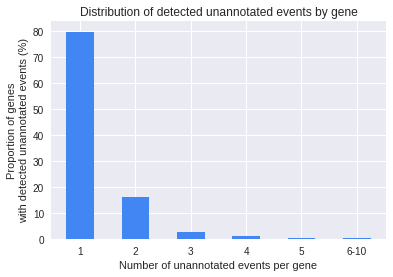

In [10]:
## Plot proportions

N=6

ind = numpy.arange(N)
width = 0.5

fig, ax = plt.subplots()
pltPercUnannotList= ax.bar(ind,percUnannotList,width,color="#4286f4")


# Set axis labels and title

#plt.ylim(0,40)
ax.set_ylabel('Proportion of genes\nwith detected unannotated events (%)')
 
#ax.set_yscale('log')
ax.set_xlabel('Number of unannotated events per gene')
ax.set_title('Distribution of detected unannotated events by gene')
ax.set_xticks(ind ) 
ax.set_xticklabels(('1','2','3','4','5','6-10')) 
#plt.xticks(rotation='vertical')

### RSEM scatterplots

Making scatterplots for RSEM counts for each list of transcripts

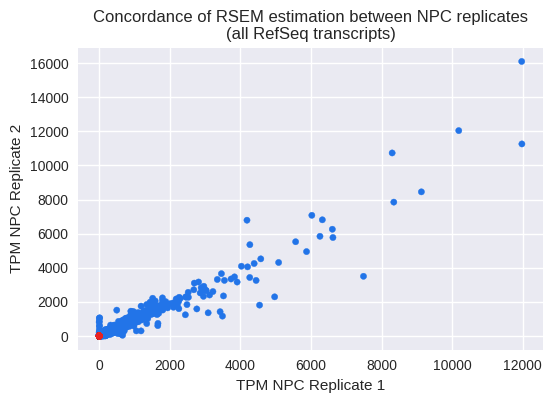

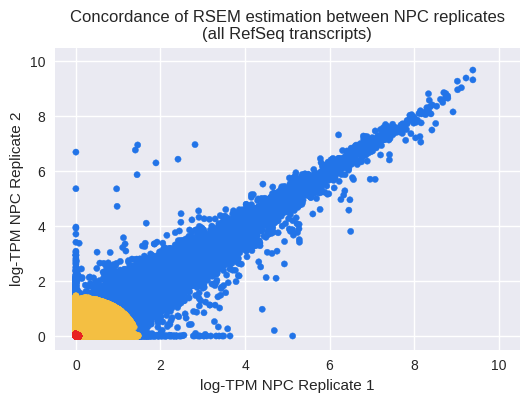

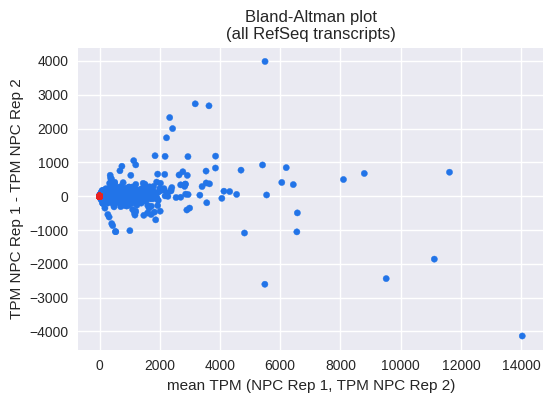

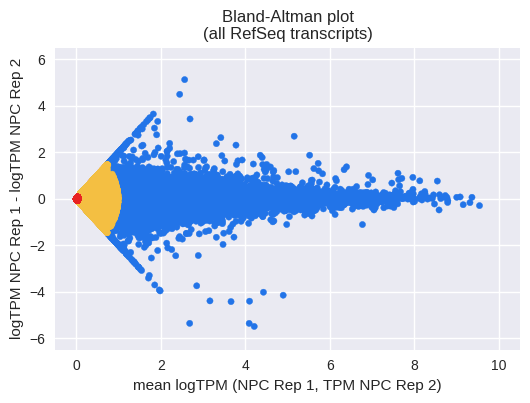

In [32]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_refseq_all.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(all RefSeq transcripts)')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(all RefSeq transcripts)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all RefSeq transcripts)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all RefSeq transcripts)')
plt.show()



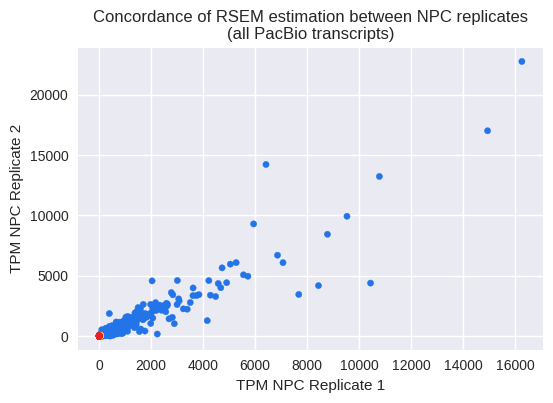

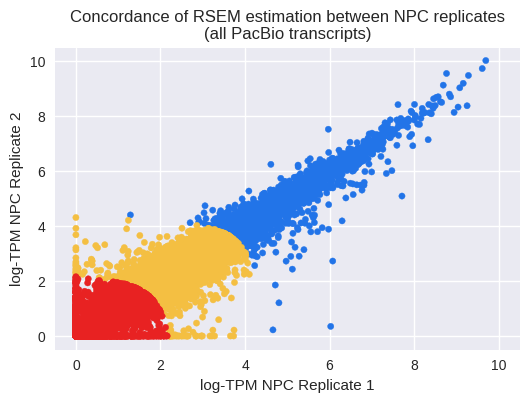

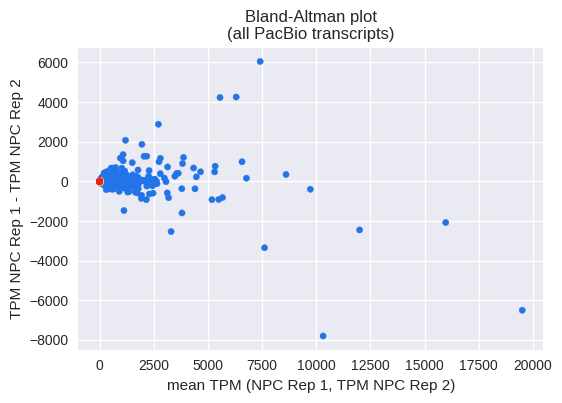

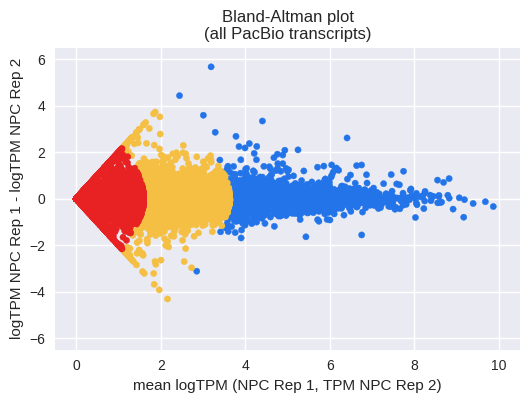

In [33]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_pacbio_all.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])


# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(all PacBio transcripts)')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(all PacBio transcripts)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all PacBio transcripts)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all PacBio transcripts)')
plt.show()


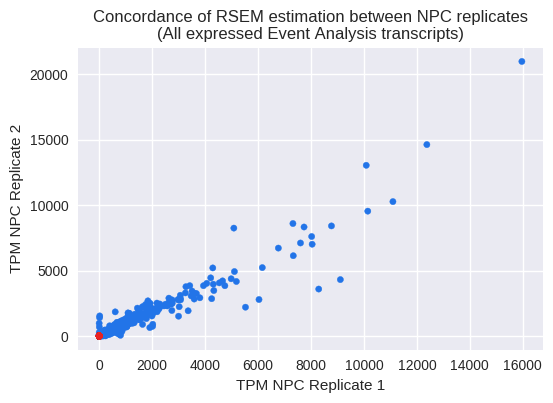

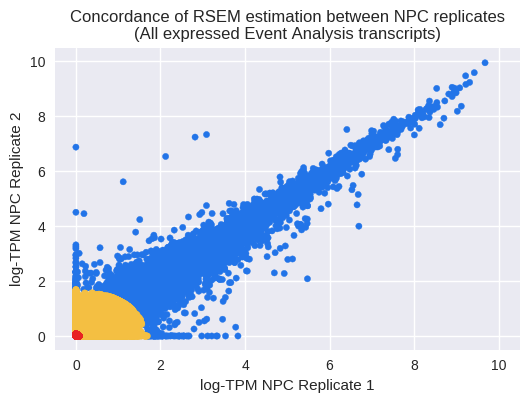

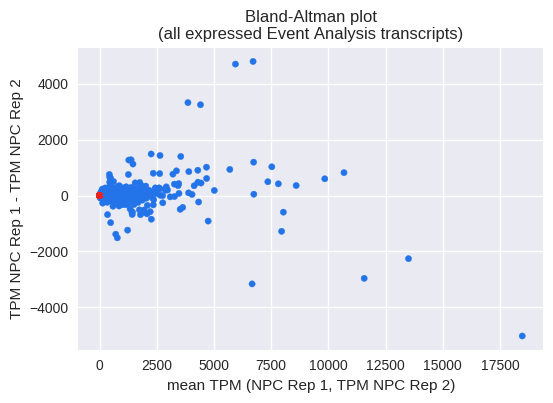

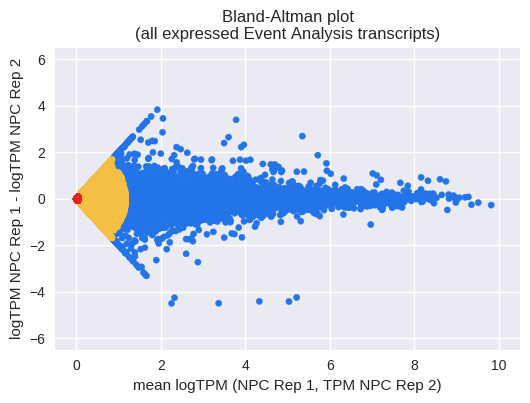

In [34]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_any.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])


# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(All expressed Event Analysis transcripts)')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(All expressed Event Analysis transcripts)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all expressed Event Analysis transcripts)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(all expressed Event Analysis transcripts)')
plt.show()


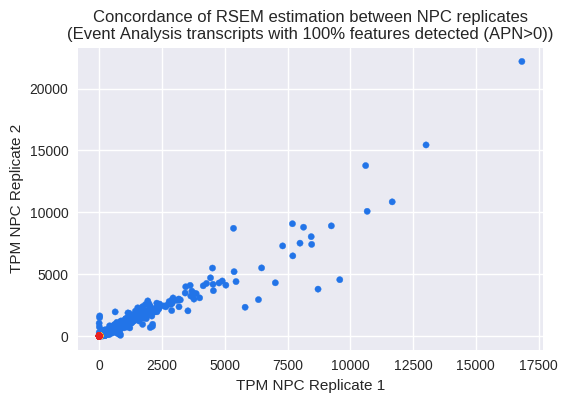

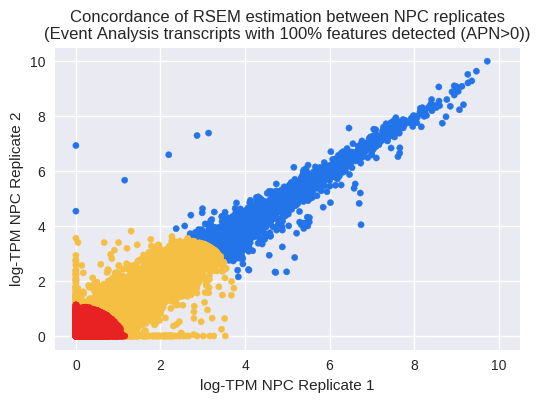

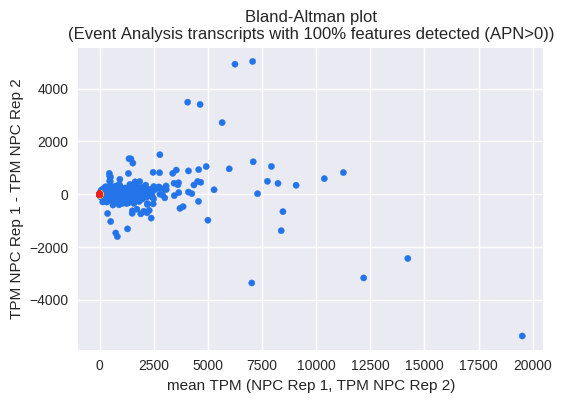

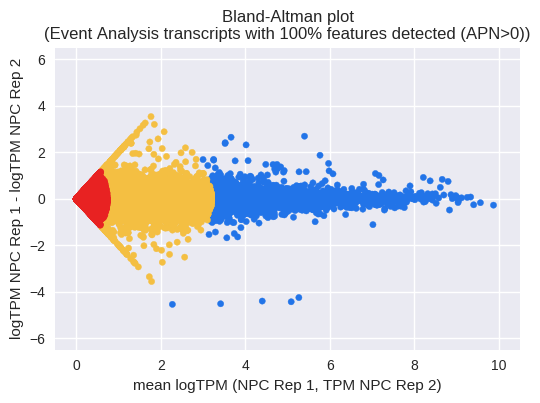

In [35]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_100perc.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])


# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with 100% features detected (APN>0))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with 100% features detected (APN>0))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with 100% features detected (APN>0))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with 100% features detected (APN>0))')
plt.show()


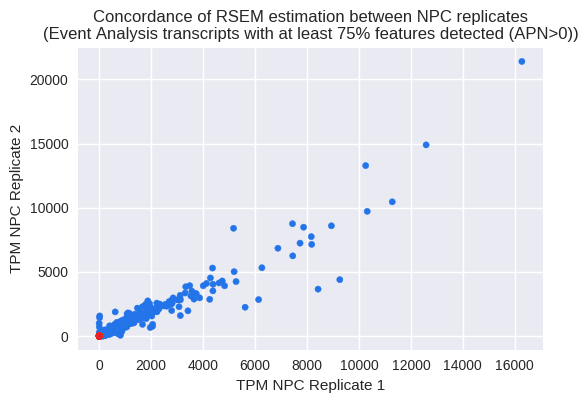

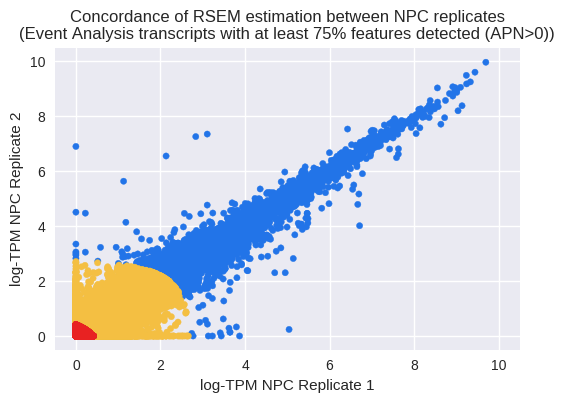

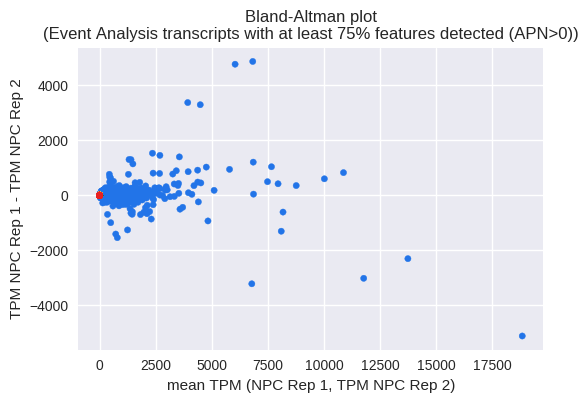

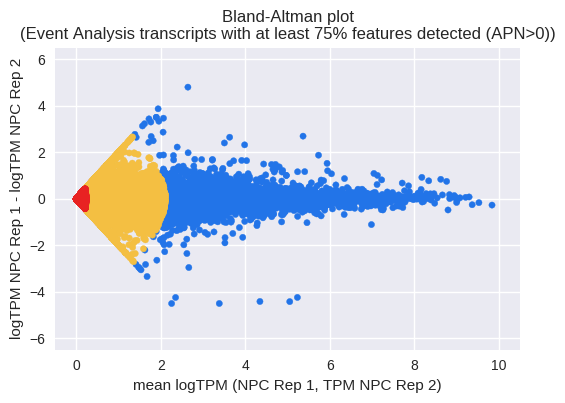

In [36]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_75perc.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])


# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>0))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>0))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>0))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>0))')
plt.show()


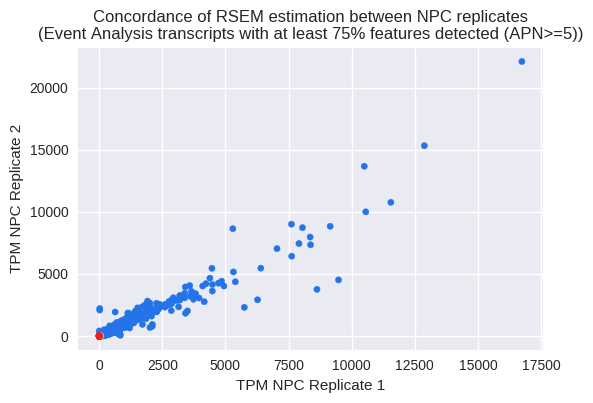

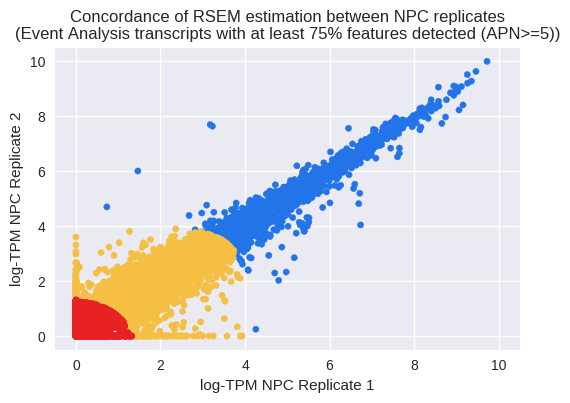

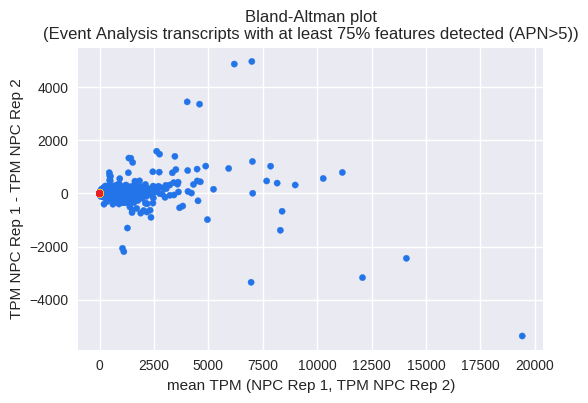

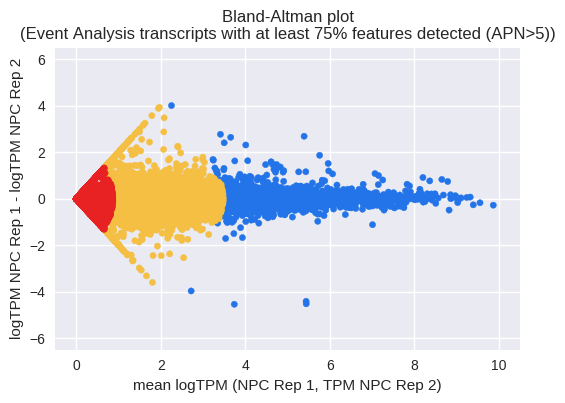

In [37]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_75perc_apn5.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])


# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>=5))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>=5))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>5))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>5))')
plt.show()


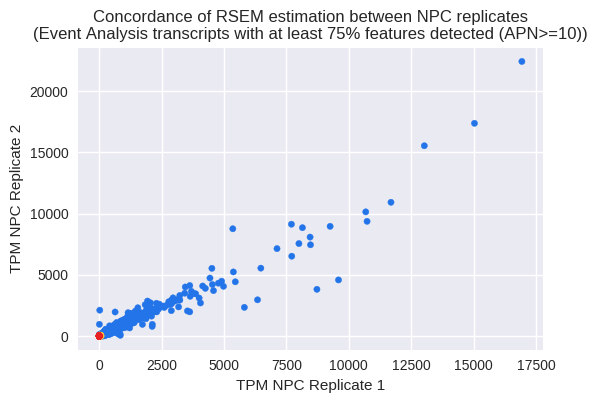

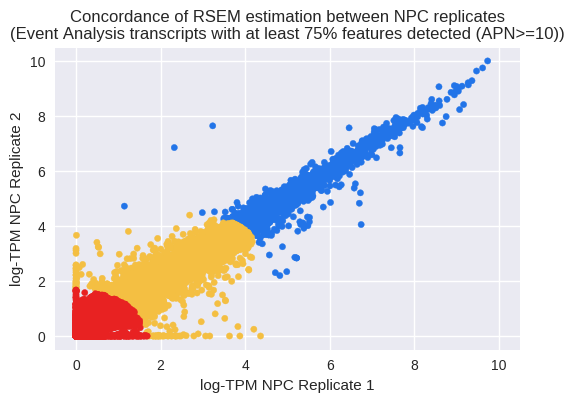

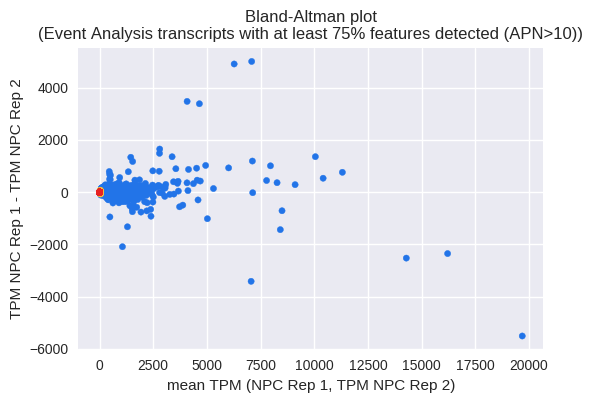

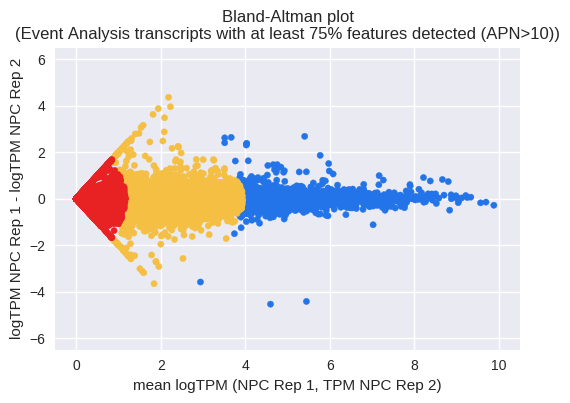

In [38]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_75perc_apn10.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>=10))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 75% features detected (APN>=10))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>10))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 75% features detected (APN>10))')
plt.show()


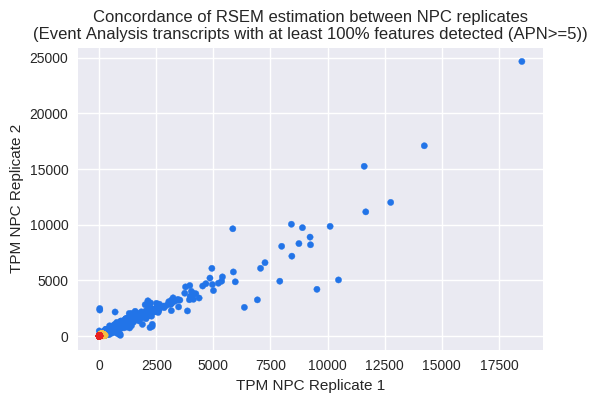

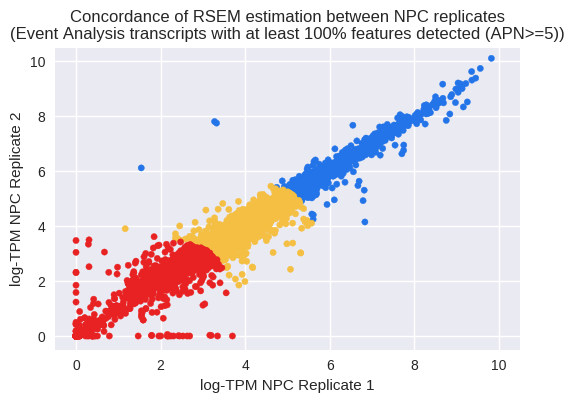

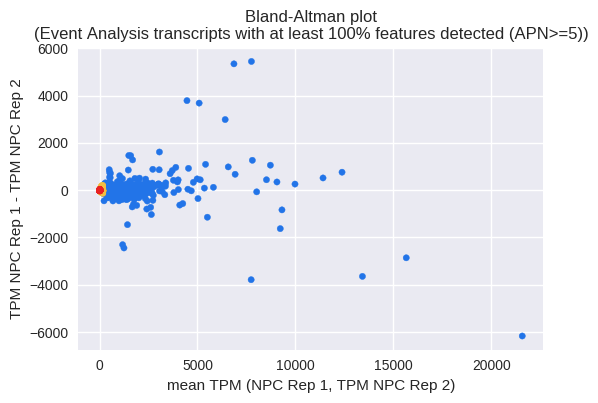

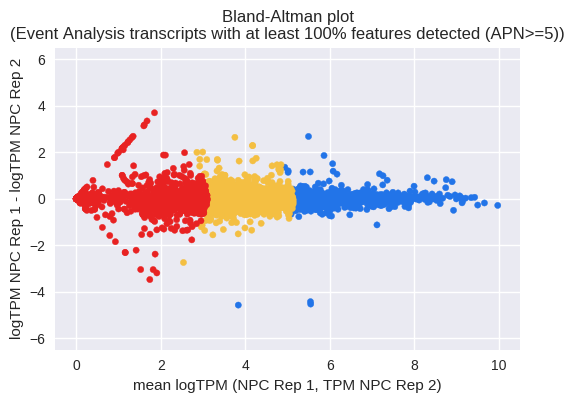

In [39]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_100perc_apn5.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 100% features detected (APN>=5))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 100% features detected (APN>=5))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 100% features detected (APN>=5))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 100% features detected (APN>=5))')
plt.show()


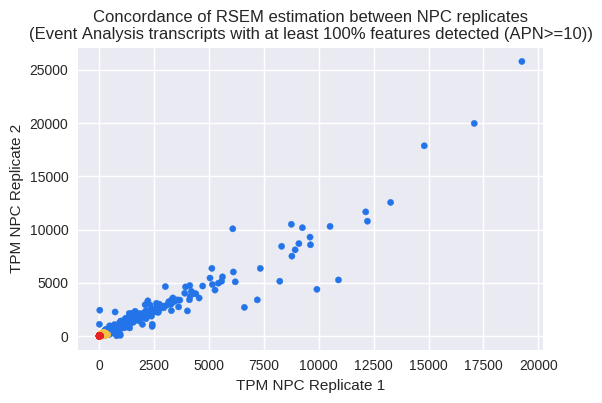

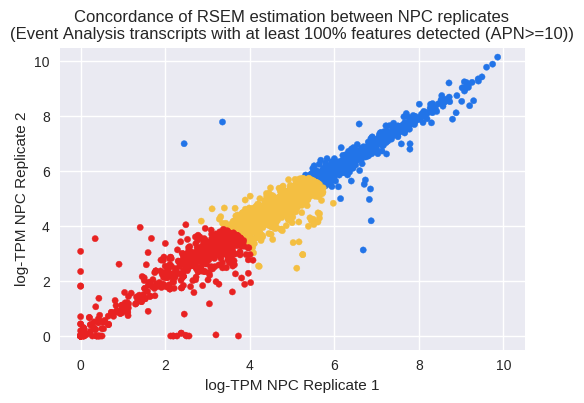

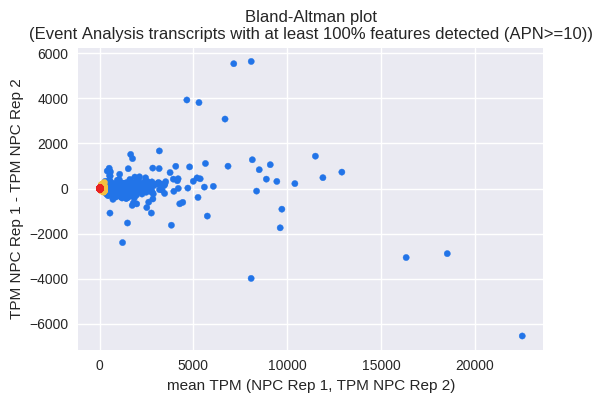

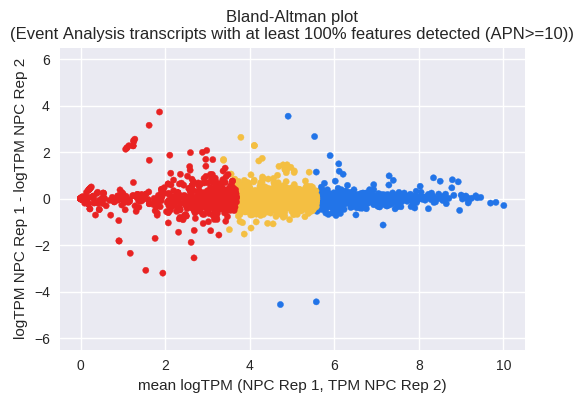

In [40]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_100perc_apn10.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 100% features detected (APN>=10))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 100% features detected (APN>=10))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 100% features detected (APN>=10))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 100% features detected (APN>=10))')
plt.show()


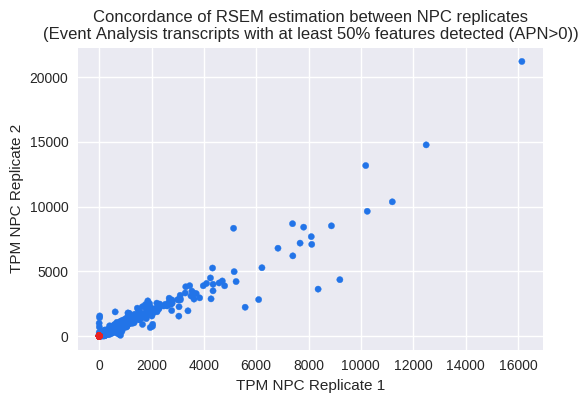

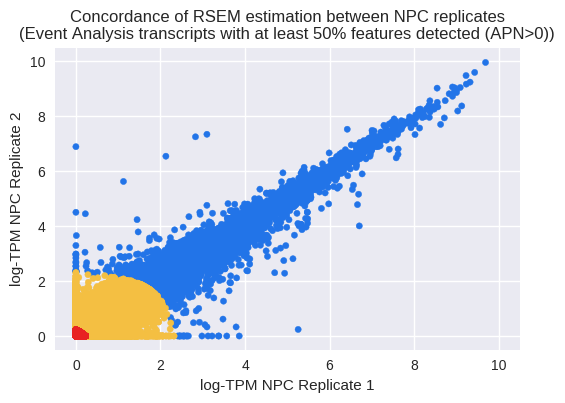

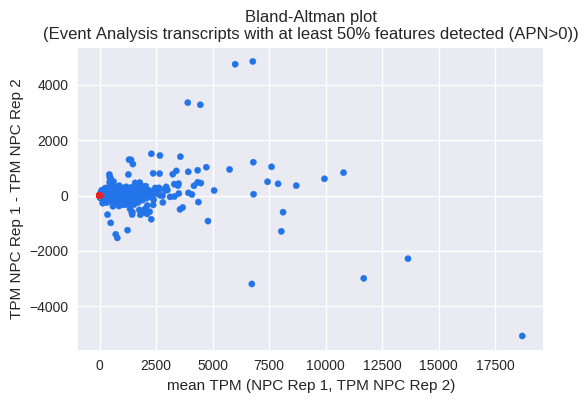

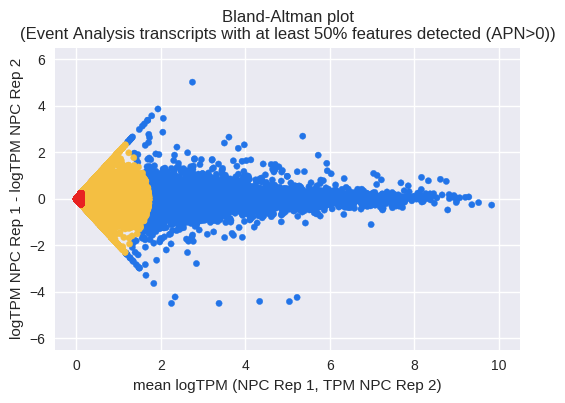

In [41]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_50perc.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>0))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>0))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>0))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>0))')
plt.show()


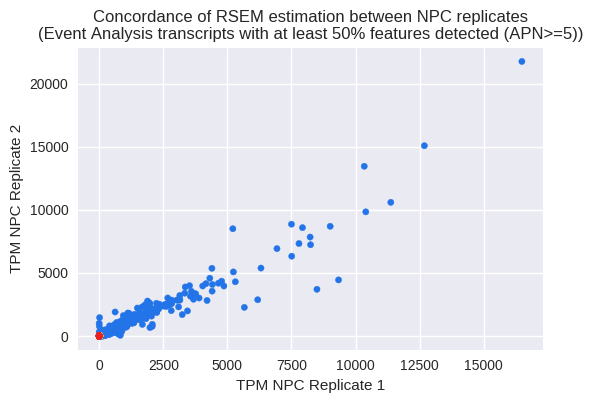

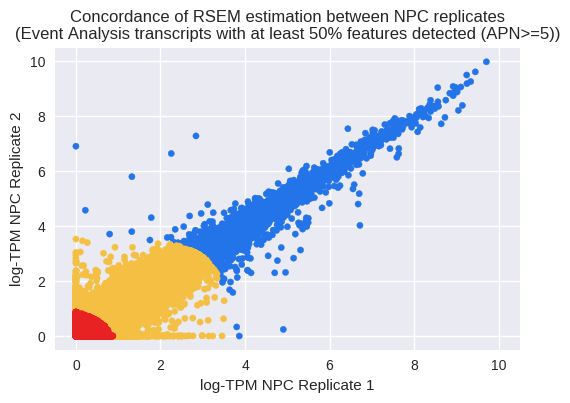

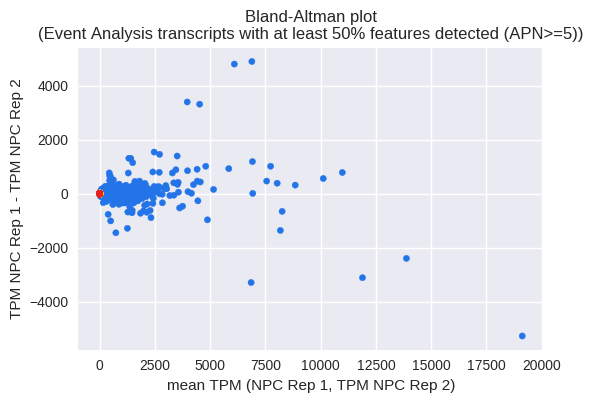

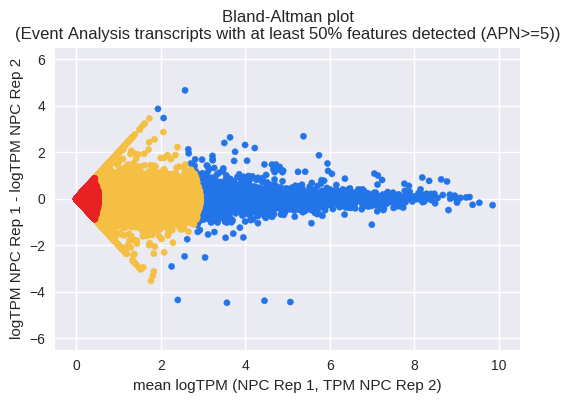

In [42]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_50perc_apn5.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>=5))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>=5))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>=5))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>=5))')
plt.show()


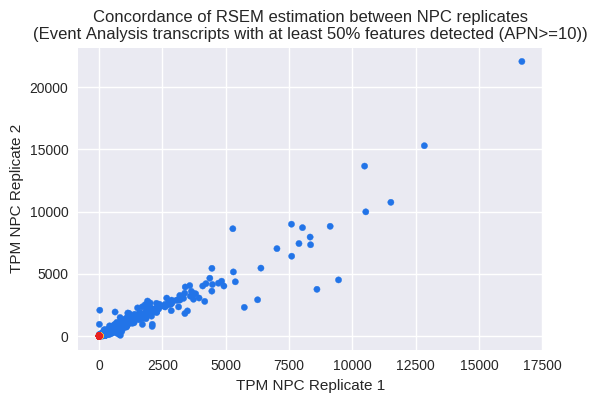

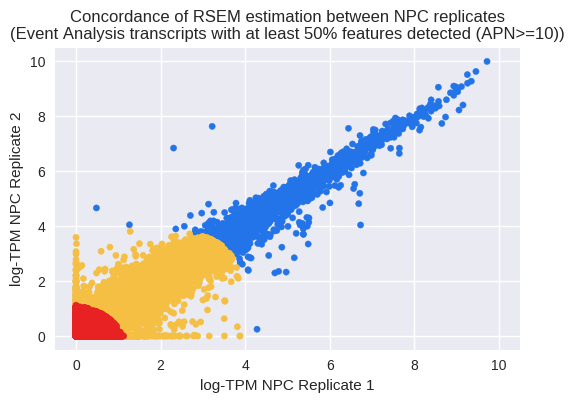

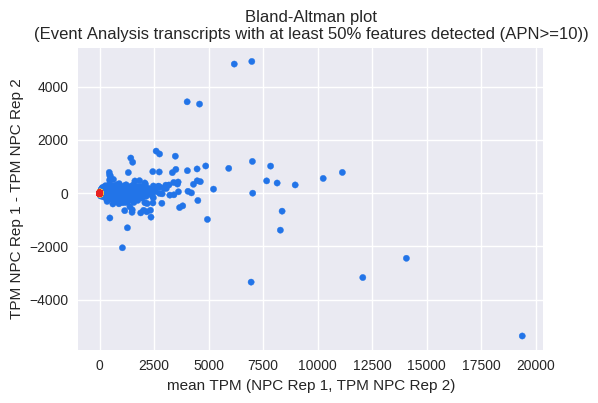

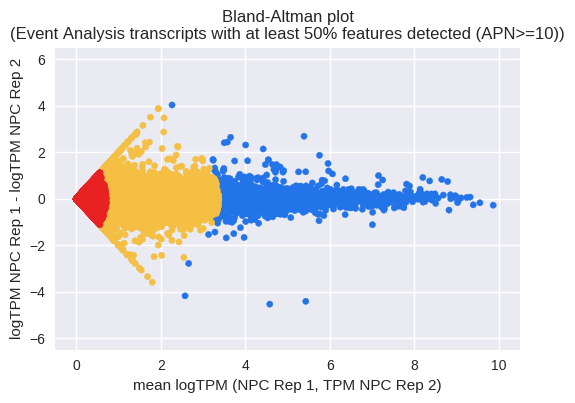

In [43]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_events_exp_50perc_apn10.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>=10))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(Event Analysis transcripts with at least 50% features detected (APN>=10))')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>=10))')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(Event Analysis transcripts with at least 50% features detected (APN>=10))')
plt.show()


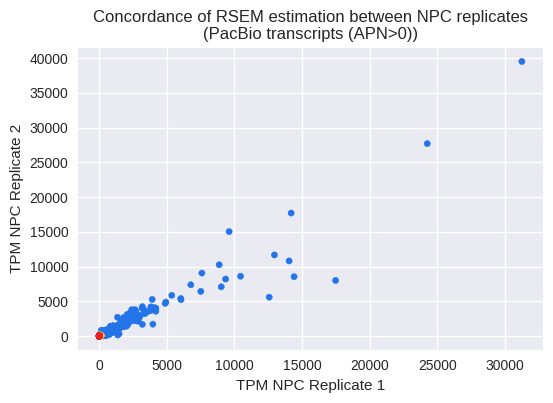

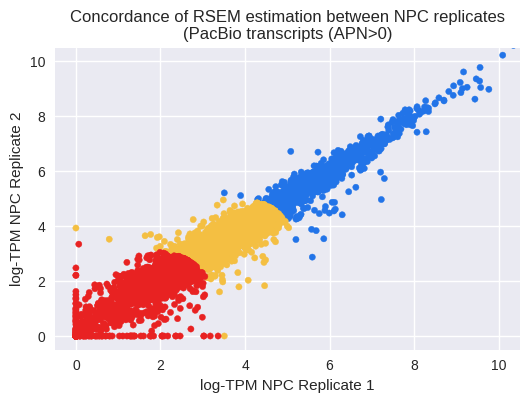

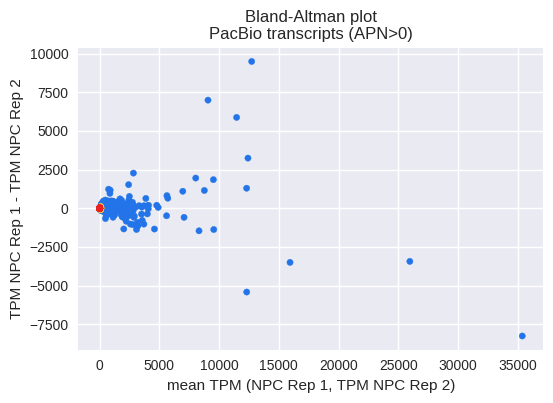

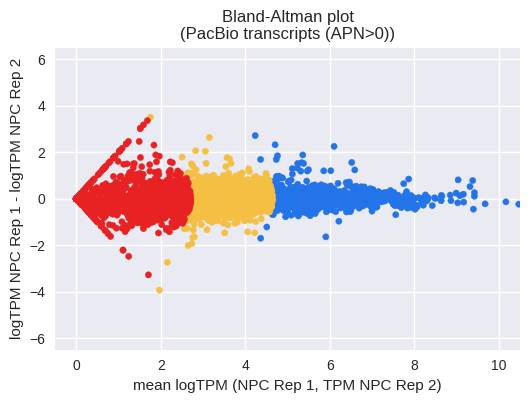

In [44]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_pacbio_apn0.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>0))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>0)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\nPacBio transcripts (APN>0)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(PacBio transcripts (APN>0))')
plt.show()


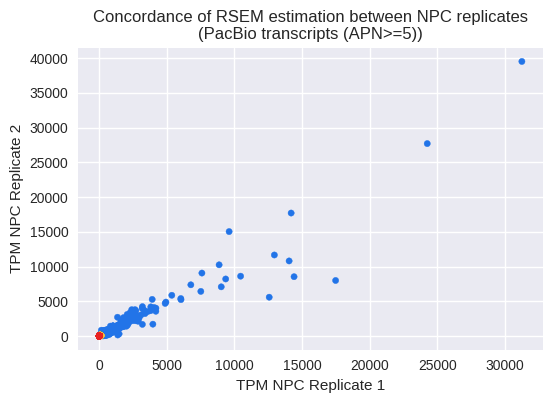

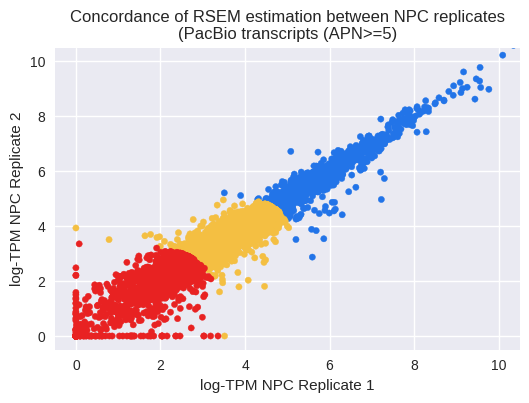

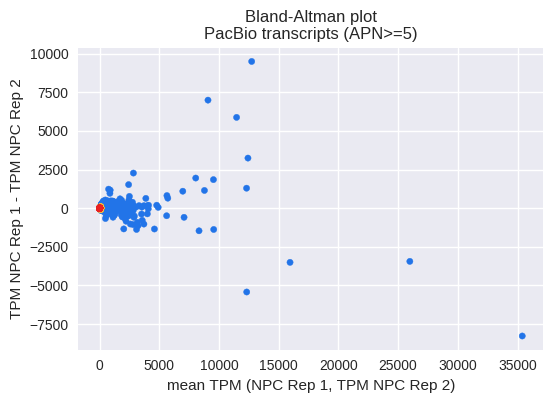

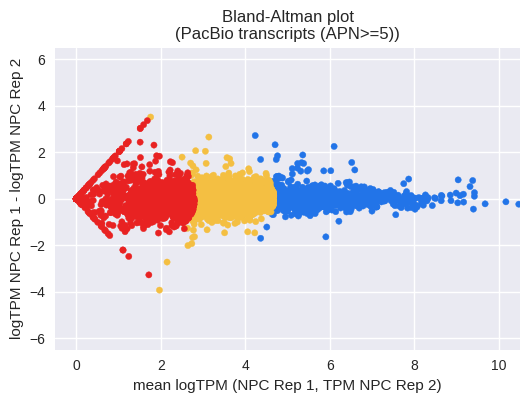

In [45]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_pacbio_apn5.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>=5))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>=5)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\nPacBio transcripts (APN>=5)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(PacBio transcripts (APN>=5))')
plt.show()


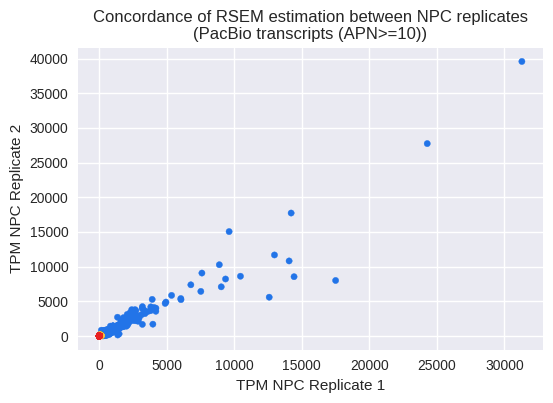

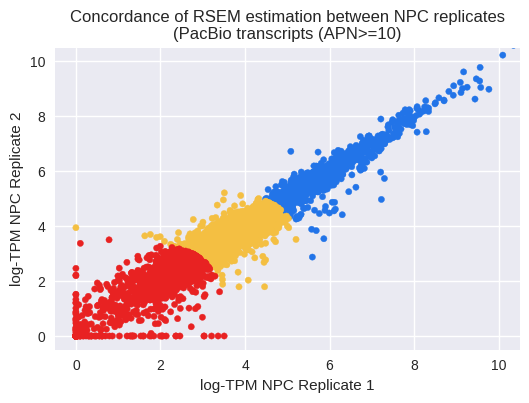

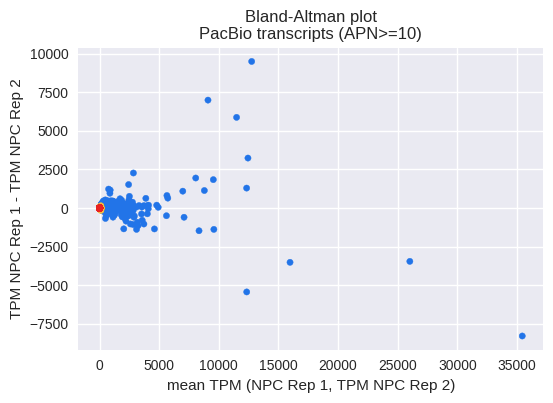

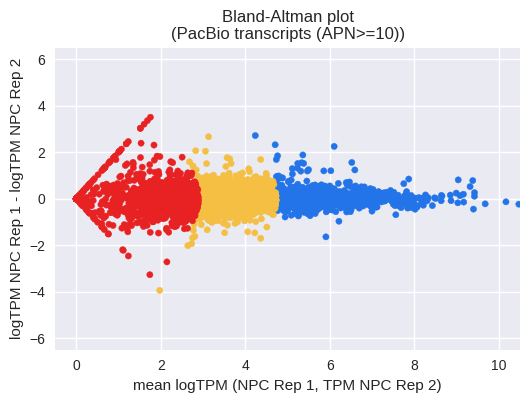

In [46]:
#import data

mcLab=os.environ["MCLAB"]

rsemData=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/rsem_fpkm_pacbio_apn10.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'), ('fpkm_nsc1','<f8'), ('fpkm_nsc2','<f8'), 
                               ('log_fpkm_nsc1','<f8'), ('log_fpkm_nsc2','<f8'), ('tpm_bin','<f8'),
                              ('mean_tpm','<f8'),('diff_tpm','<f8'),
                              ('mean_log_tpm','<f8'),('diff_log_tpm','<f8')])

# Index   Variable               Description
#  0      transcript_id          TranscriptID
#  1      fpkm_nsc1              FPKM Rep 1
#  2      fpkm_nsc2              FPKM Rep 2
#  3      log_fpkm_nsc1          log FPKM Rep 1
#  4      log_fpkm_nsc2          log FPKM Rep 2
#  5      tpm_bin                Transcripts binned by mean TPM: 1=min-Q1, 2=Q1-Q3, 3=Q3-max


#set up data
rep1=[]
rep2=[]
logRep1=[]
logRep2=[]
binColor=[]
meanRaw=[]
diffRaw=[]
meanLog=[]
diffLog=[]

for i in range(0,len(rsemData)):
    rep1.append(rsemData[i][1])
    rep2.append(rsemData[i][2])
    logRep1.append(rsemData[i][3])
    logRep2.append(rsemData[i][4])
    meanRaw.append(rsemData[i][6])
    diffRaw.append(rsemData[i][7])
    meanLog.append(rsemData[i][8])
    diffLog.append(rsemData[i][9])
    if rsemData[i][5] == 1:
        binColor.append('#e82222')
    elif rsemData[i][5] == 2:
        binColor.append('#f4bf42')
    elif rsemData[i][5] == 3:
        binColor.append('#2274e8')


# Plot

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr1 = ax.scatter(rep1,rep2, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Replicate 2')
ax.set_xlabel('TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>=10))')
plt.show()

fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(logRep1,logRep2, s=20, color=binColor)

plt.xlim(-0.5,10.5)
plt.ylim(-0.5,10.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('log-TPM NPC Replicate 2')
ax.set_xlabel('log-TPM NPC Replicate 1') 
ax.set_title('Concordance of RSEM estimation between NPC replicates\n(PacBio transcripts (APN>=10)')
plt.show()



# BA plots


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanRaw,diffRaw, s=20, color=binColor)

#plt.xlim(-10,25000)
#plt.ylim(-10,25000)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('TPM NPC Rep 1 - TPM NPC Rep 2')
ax.set_xlabel('mean TPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\nPacBio transcripts (APN>=10)')
plt.show()


fig,ax = plt.subplots(figsize=(6,4), dpi=100)
pltCorr2 = ax.scatter(meanLog,diffLog, s=20, color=binColor)
plt.xlim(-0.5,10.5)
plt.ylim(-6.5,6.5)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_ylabel('logTPM NPC Rep 1 - logTPM NPC Rep 2')
ax.set_xlabel('mean logTPM (NPC Rep 1, TPM NPC Rep 2)') 
ax.set_title('Bland-Altman plot\n(PacBio transcripts (APN>=10))')
plt.show()


### Scatterplot -- number of unique events vs proportion of unique features detected

38635
38635


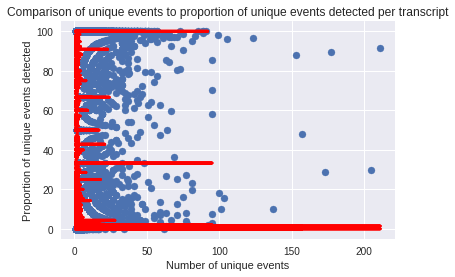

In [73]:
from statsmodels.nonparametric.smoothers_lowess import lowess
mcLab=os.environ["MCLAB"]

## Feature info
uniqDtct=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/xscripts_uniq_feat_by_perc_dtct.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'),('num_unique_features','<f8'),('perc_unique_features_dtct','<f8')])


numUniq=[]
percUniqDtct=[]

for i in range(0,len(uniqDtct)):
    numUniq.append(uniqDtct[i][1])
    percUniqDtct.append(uniqDtct[i][2]*100)

print(len(numUniq))
print(len(percUniqDtct))

fig,ax=plt.subplots()
pltUniq2Dtct = ax.scatter(numUniq,percUniqDtct)

percUniqDtctSmoothed = lowess(numUniq, percUniqDtct)
_ = plt.plot(numUniq,percUniqDtctSmoothed,'red',linewidth=3)

ax.set_ylabel('Proportion of unique events detected')
ax.set_xlabel('Number of unique events')
ax.set_title('Comparison of unique events to proportion of unique events detected per transcript')
    


In [87]:
import statsmodels

In [143]:

### Make a scatterplot comparing the number of isoforms for gene against the proportion of isoforms with unique features

mcLab=os.environ["MCLAB"]

## Feature info
tpm2dtct=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/xscripts_mean_tpm2perc_dtct.csv', delimiter=",", names=True,
                        dtype=[('transcript_id','|S30'),('perc_features_dtct','<f8'),('mean_tpm','<f8')])



# Index  Variable 
# 0     transcript_id
# 1     perc_features_dtct
# 2     mean_tpm

percDtct=[]
meanTPM=[]

for i in range(0,len(tpm2dtct)):
    if tpm2dtct[i][2] > 0:
        percDtct.append(tpm2dtct[i][1]*100)
        #meanTPM.append(math.log(tpm2dtct[i][2]+1))
        meanTPM.append(tpm2dtct[i][2])

print(len(percDtct))
print(len(meanTPM))
     


45464
45464


In [150]:
   

meanTPMSmoothed = lowess(meanTPM,percDtct,frac=0.5, it=3, delta=0)[:,1]

meanTPMSmoothed

array([ 0.01801155,  0.01801155,  0.01844609, ...,  1.36084791,
        1.36084791,  1.36084791])

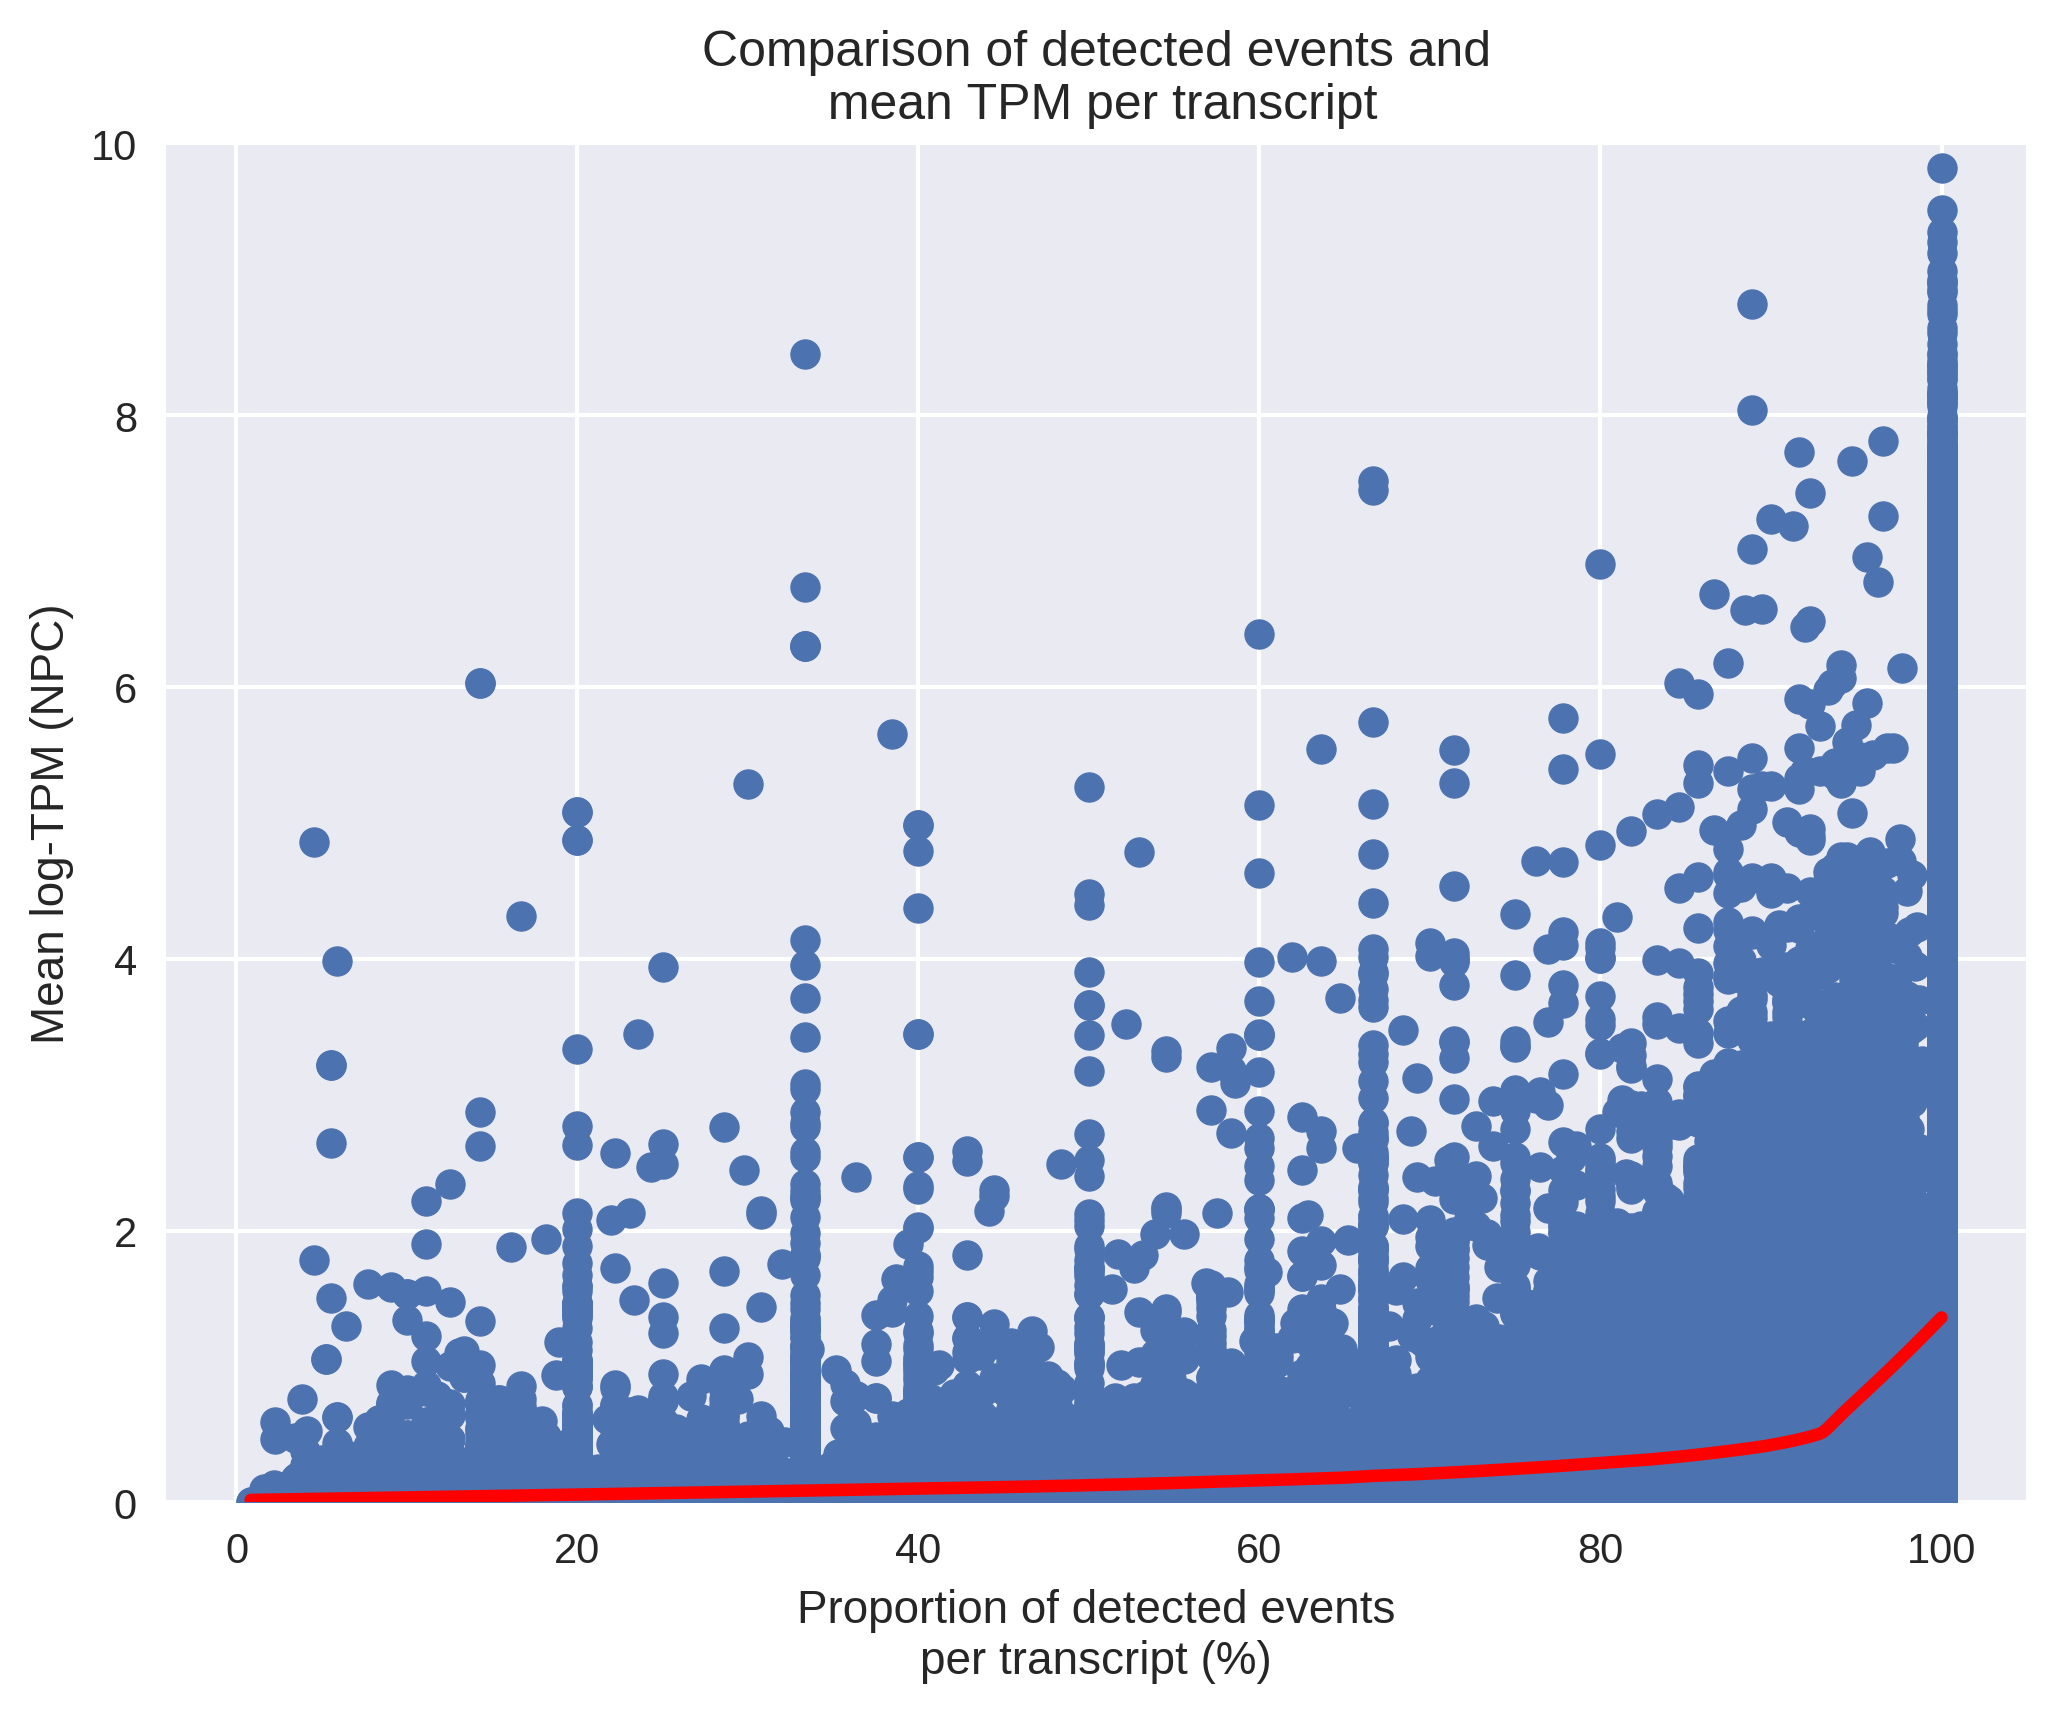

In [151]:

fig,ax = plt.subplots(figsize=(8,6), dpi=300)
pltTPM2dtct = ax.scatter(percDtct,meanTPM)
pltSmoothed = plt.plot(percDtct,meanTPMSmoothed,'red',linewidth=3)
#plt.xlim(-10,150)
plt.ylim(0,10)
ax.set_xlabel('Proportion of detected events\nper transcript (%)')
ax.set_ylabel('Mean log-TPM (NPC)')
ax.set_title('Comparison of detected events and\n mean TPM per transcript')

plt.show()

12296
12296


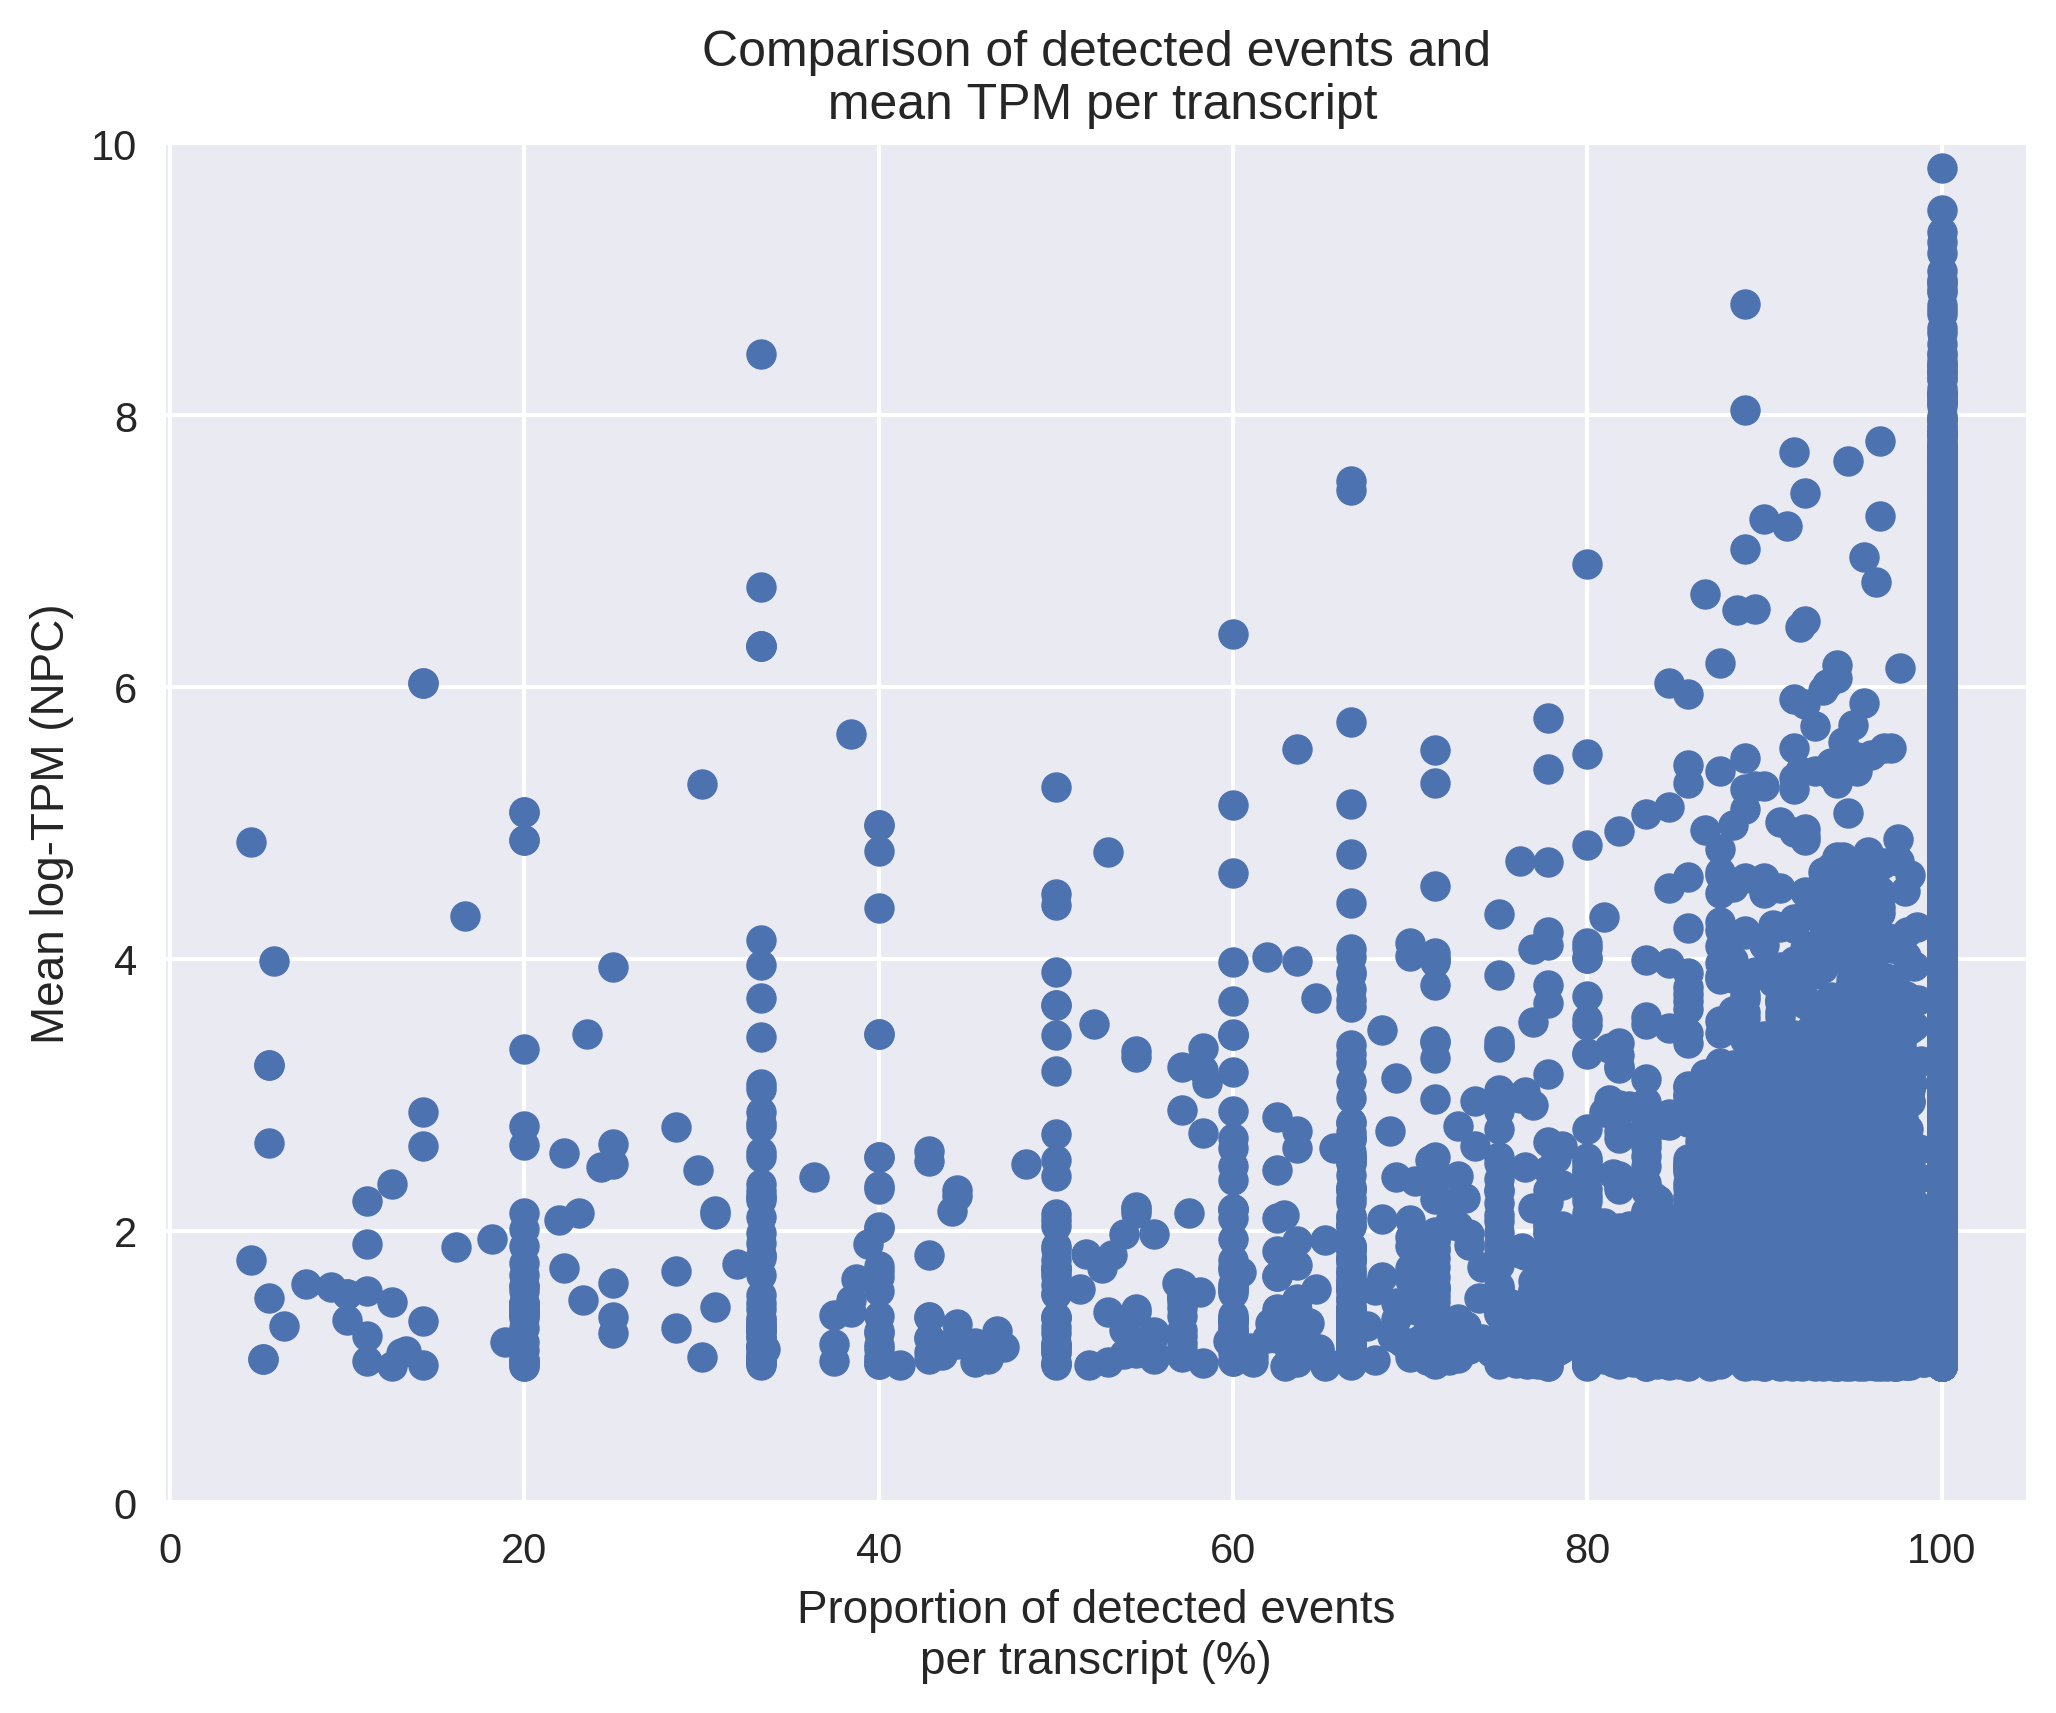

In [39]:
percDtct=[]
meanTPM=[]

for i in range(0,len(tpm2dtct)):
    if tpm2dtct[i][2] > 1:
        percDtct.append(tpm2dtct[i][1]*100)
        #meanTPM.append(math.log(tpm2dtct[i][2]+1))
        meanTPM.append(tpm2dtct[i][2])

print(len(percDtct))
print(len(meanTPM))
        
fig,ax = plt.subplots(figsize=(8,6), dpi=300)
pltTPM2dtct = ax.scatter(percDtct,meanTPM)

#plt.xlim(-10,150)
plt.ylim(0,10)
ax.set_xlabel('Proportion of detected events\nper transcript (%)')
ax.set_ylabel('Mean log-TPM (NPC)')
ax.set_title('Comparison of detected events and\n mean TPM per transcript')

plt.show()

## Long read counts vs PacBio TPM bins

In [28]:
#import data

mcLab=os.environ["MCLAB"]

## NSCs
pbLRbins=numpy.genfromtxt(mcLab + '/event_analysis/analysis_output/pacbio_lr_count_w_tpm_bin.csv',
                          delimiter=",", names=True,
                          dtype=[('transcript_id','|S30'),('mean_npc_fl','<f8'),('mean_npc_all','<f8'),
                                 ('tpm_bin_pacbio_all','<f8'),('tpm_bin_pacbio_apn0','<f8'),
                                 ('tpm_bin_pacbio_apn5','<f8'),('tpm_bin_pacbio_apn10','<f8')])

# Index   Variable
# 0       transcript_id
# 1       mean_npc_fl
# 2       mean_npc_all
# 3       tpm_bin_pacbio_all
# 4       tpm_bin_pacbio_apn0
# 5       tpm_bin_pacbio_apn5
# 6       tpm_bin_pacbio_apn10



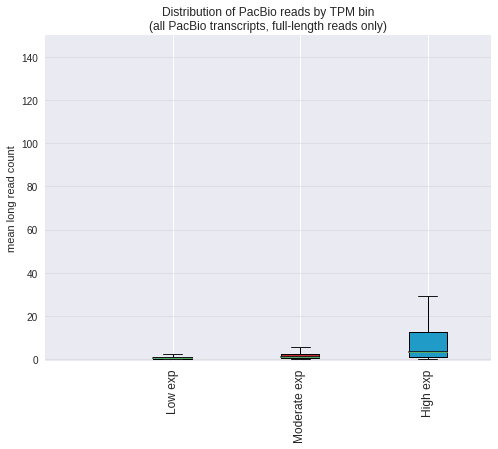

In [56]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][3] == 1 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin1.append(pbLRbins[i][1])
    elif pbLRbins[i][3] == 2 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin2.append(pbLRbins[i][1])
    elif pbLRbins[i][3] == 3 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin3.append(pbLRbins[i][1])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(all PacBio transcripts, full-length reads only)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

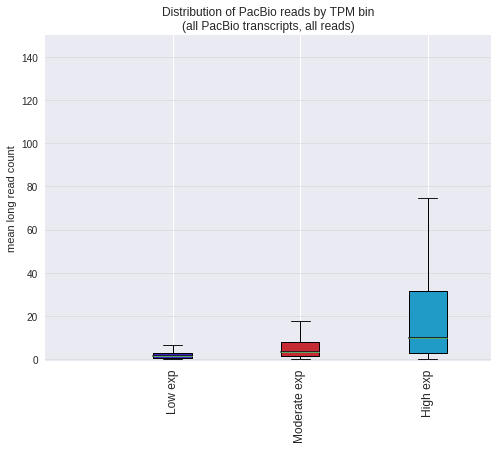

In [57]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][3] == 1 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin1.append(pbLRbins[i][2])
    elif pbLRbins[i][3] == 2 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin2.append(pbLRbins[i][2])
    elif pbLRbins[i][3] == 3 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin3.append(pbLRbins[i][2])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(all PacBio transcripts, all reads)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

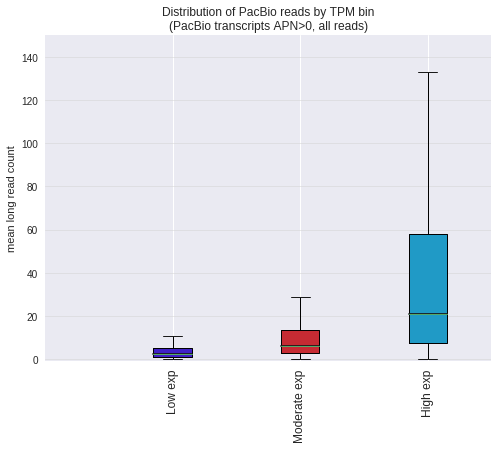

In [58]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][4] == 1 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin1.append(pbLRbins[i][2])
    elif pbLRbins[i][4] == 2 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin2.append(pbLRbins[i][2])
    elif pbLRbins[i][4] == 3 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin3.append(pbLRbins[i][2])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>0, all reads)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

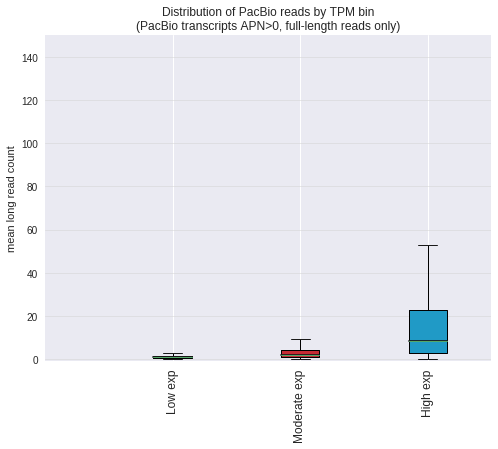

In [59]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][4] == 1 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin1.append(pbLRbins[i][1])
    elif pbLRbins[i][4] == 2 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin2.append(pbLRbins[i][1])
    elif pbLRbins[i][4] == 3 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin3.append(pbLRbins[i][1])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>0, full-length reads only)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

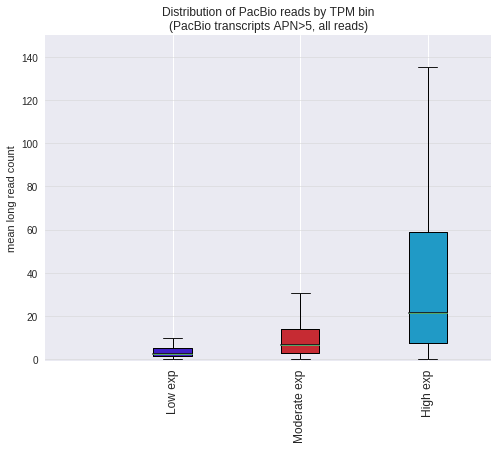

In [60]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][5] == 1 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin1.append(pbLRbins[i][2])
    elif pbLRbins[i][5] == 2 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin2.append(pbLRbins[i][2])
    elif pbLRbins[i][5] == 3 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin3.append(pbLRbins[i][2])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>5, all reads)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

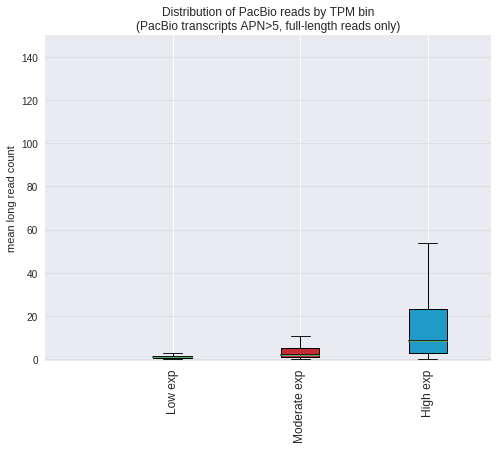

In [61]:
##### set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][5] == 1 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin1.append(pbLRbins[i][1])
    elif pbLRbins[i][5] == 2 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin2.append(pbLRbins[i][1])
    elif pbLRbins[i][5] == 3 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin3.append(pbLRbins[i][1])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>5, full-length reads only)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

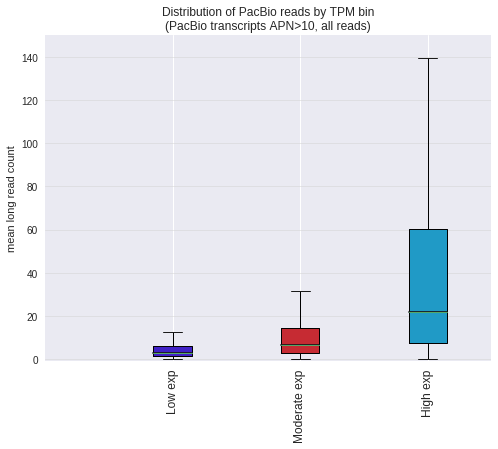

In [62]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][6] == 1 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin1.append(pbLRbins[i][2])
    elif pbLRbins[i][6] == 2 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin2.append(pbLRbins[i][2])
    elif pbLRbins[i][6] == 3 and ~numpy.isnan(pbLRbins[i][2]):
        dfBin3.append(pbLRbins[i][2])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>10, all reads)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

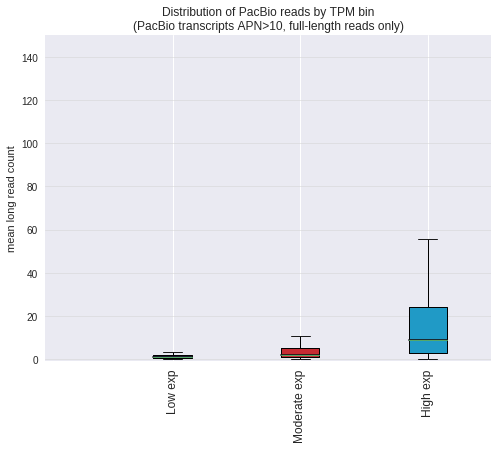

In [63]:
## set up data for each plot


## Plot 1: FL reads only, all PB
dfBin1=[]
dfBin2=[]
dfBin3=[]

for i in range(0,len(pbLRbins)):
    if pbLRbins[i][6] == 1 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin1.append(pbLRbins[i][1])
    elif pbLRbins[i][6] == 2 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin2.append(pbLRbins[i][1])
    elif pbLRbins[i][6] == 3 and ~numpy.isnan(pbLRbins[i][1]):
        dfBin3.append(pbLRbins[i][1])



numDist=3
pltData=[dfBin1,dfBin2,dfBin3]

fig, ax1 = plt.subplots(figsize=(8,6))

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of PacBio reads by TPM bin\n(PacBio transcripts APN>10, full-length reads only)')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('mean long read count')

# Now fill the boxes with desired colors
boxColors = ["#4021c6", "#c62b33", "#209ac6"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 3
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['Low exp','Moderate exp','High exp']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 150
bottom = -1
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
#plt.yscale('log')
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()

### Updated Fig 8F



In [65]:

mcLab=os.environ["MCLAB"]

## Feature info
xsDtct=numpy.genfromtxt(mcLab + '/event_analysis/xscripts_w_uniq_dtct_total_dtct.csv', delimiter=",",
                        names=True, dtype=[('transcript_id','|S30'),('perc_features_dtct','<f8'),
                                           ('perc_unique_features_dtct','<f8')])

# index variable
# 0     transcript_id
# 1     perc_features_dtct
# 2     perc_unique_features_dtct


In [68]:

##### set up data for plot

xsDtct0=[]
xsDtct25=[]
xsDtct50=[]
xsDtct75=[]
xsDtct100=[]

for xs in range(0,len(xsDtct)):
    if xsDtct[xs][1] == 1:
        xsDtct100.append(xsDtct[xs][2]*100)
    elif xsDtct[xs][1] >= 0.75:
        xsDtct75.append(xsDtct[xs][2]*100)
    elif xsDtct[xs][1] >= 0.5:
        xsDtct50.append(xsDtct[xs][2]*100)
    elif xsDtct[xs][1] >= 0.25:
        xsDtct25.append(xsDtct[xs][2]*100)
    elif xsDtct[xs][1] > 0:
        xsDtct0.append(xsDtct[xs][2]*100)


### COLORS FOR BINS:
# 100	172,174,177	ACAEB1
# 75	160,80,159	A0509F
# 50	37,170,225	25AAE1
# 25	247,148,30	F7941E
# 0	191,30,46	BF1E2E


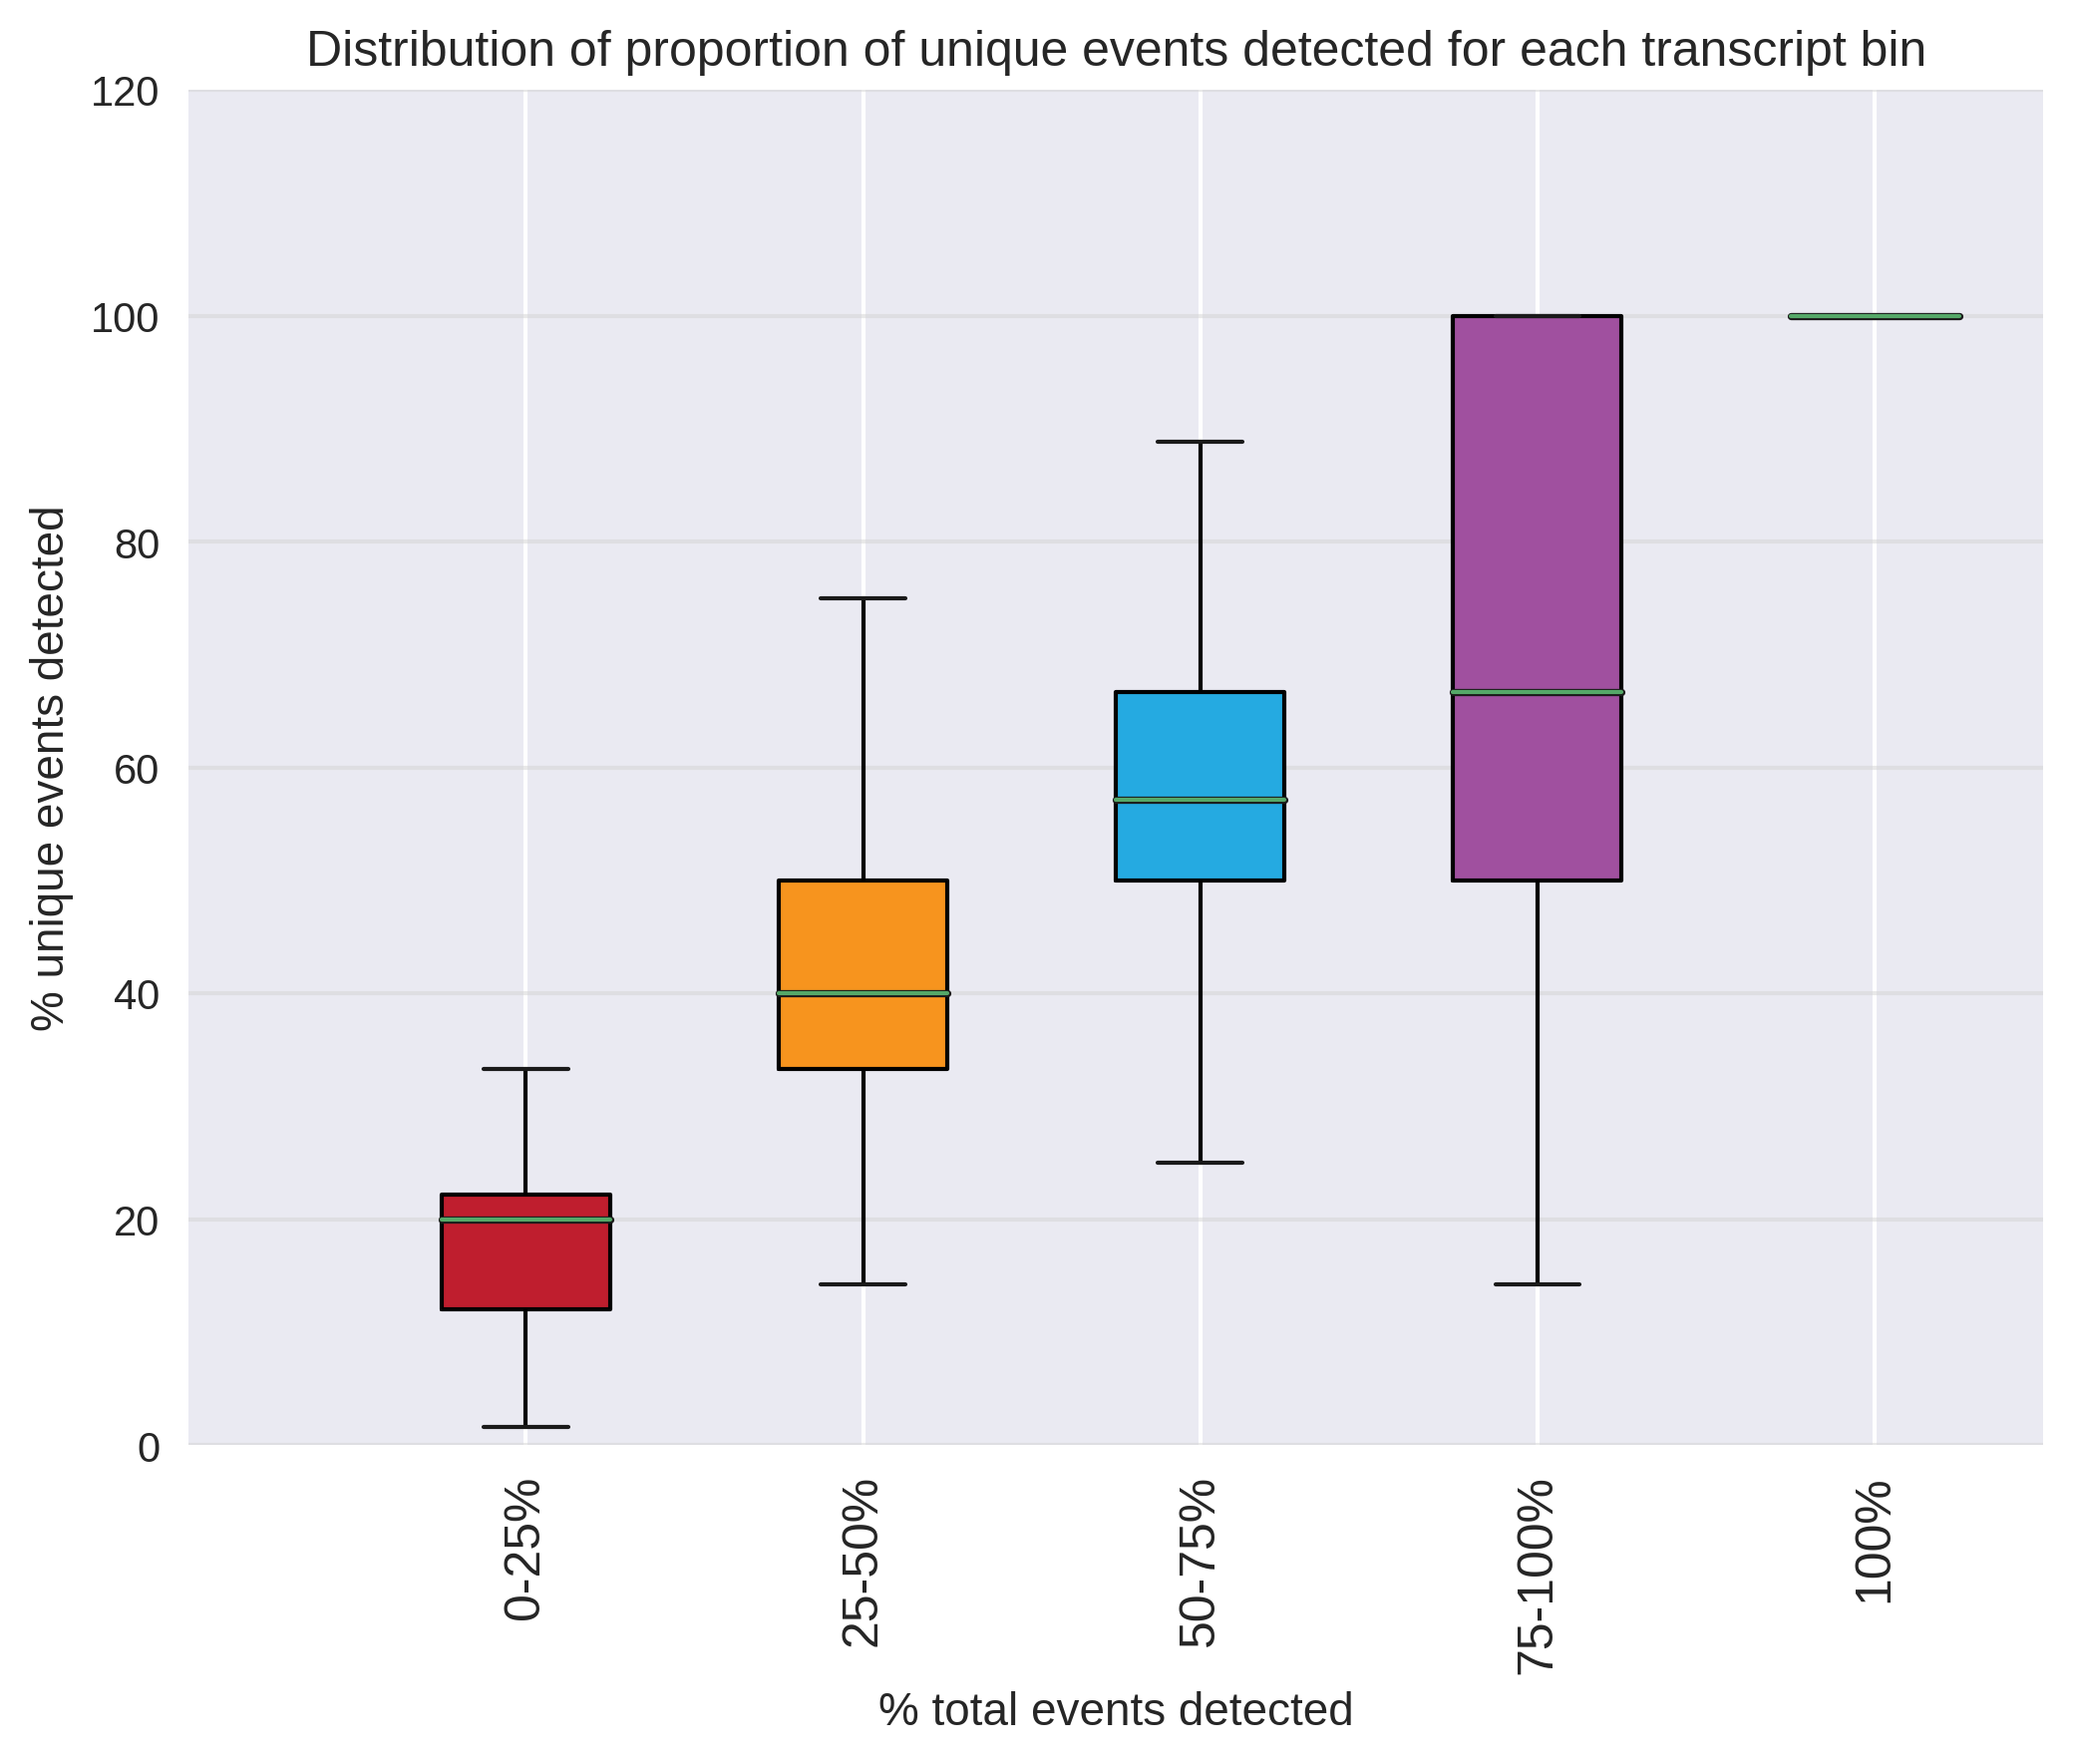

In [71]:

numDist=5
pltData=[xsDtct0,xsDtct25,xsDtct50,xsDtct75,xsDtct100]

fig, ax1 = plt.subplots(figsize=(8,6), dpi=300)

bp = plt.boxplot(pltData, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
#plt.setp(bp['fliers'], color='red', marker='+')


# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Distribution of proportion of unique events detected for each transcript bin')
#ax1.set_xlabel('Feature type by transcript specificity')
ax1.set_ylabel('% unique events detected')
ax1.set_xlabel('% total events detected')

# Now fill the boxes with desired colors
boxColors = ["#BF1E2E", "#F7941E", "#25AAE1", "#A0509F", "#ACAEB1"]
numBoxes = numDist
medians = list(range(numBoxes))
for i in range(numBoxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    # Alternate between colors
    k = i % 5
    boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
    ax1.add_patch(boxPolygon)
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        plt.plot(medianX, medianY, 'k')
        medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
#    plt.plot([numpy.average(med.get_xdata())], [numpy.average(data[i])],
#             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
xLabelArray=['0-25%','25-50%','50-75%','75-100%','100%']
ax1.set_xlim(0, numBoxes+ 0.5)
top = 120
bottom = 0
ax1.set_ylim(bottom, top)
xtickNames = plt.setp(ax1, xticklabels=xLabelArray)
plt.setp(xtickNames, rotation=90, fontsize=12)

plt.show()